# AIRBNB_BOOKINGS_ANALYSIS_Capstone_Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **A Project By**    - Vani Bhatt

# **Project Summary -**

Write the summary here within 500-600 words.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world.


Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.



This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/vani4vani/AiBnB_Bookings_Analysis_Capstone_Project.git

git@github.com:vani4vani/AiBnB_Bookings_Analysis_Capstone_Project.git

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

The goal of this project is to analyze the Airbnb bookings dataset to gain insights into customer behavior, pricing trends, and host performance.
The analysis will be used to make recommendations to improve the Airbnb platform and provide a better experience for both guests and hosts.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# **Let's Begin**

## ***1. Know Your Data***

### Mounting the drive

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

### Dataset Loading

In [ ]:
# Load Dataset

df_air=pd.read_csv('/content/drive/MyDrive/AlmaBetter_assignments/Captone Project-AirBnb Bookings Analysis/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
# Head of the dataset

df_air.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
# Tail of the dataset

df_air.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [ ]:
# # Plotting the dataset in a map
# Since according to the dataset we have been provided with the latitude and longitude so we will use folium libraries to present the data into a map.
#  This map can be zoomed and the individual locations can be viewed in detail. I have used the zoom start to 9 so that the clusters can be visible.

Long=-73.80
Lat=40.80
locations = list(zip(df_air.latitude, df_air.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

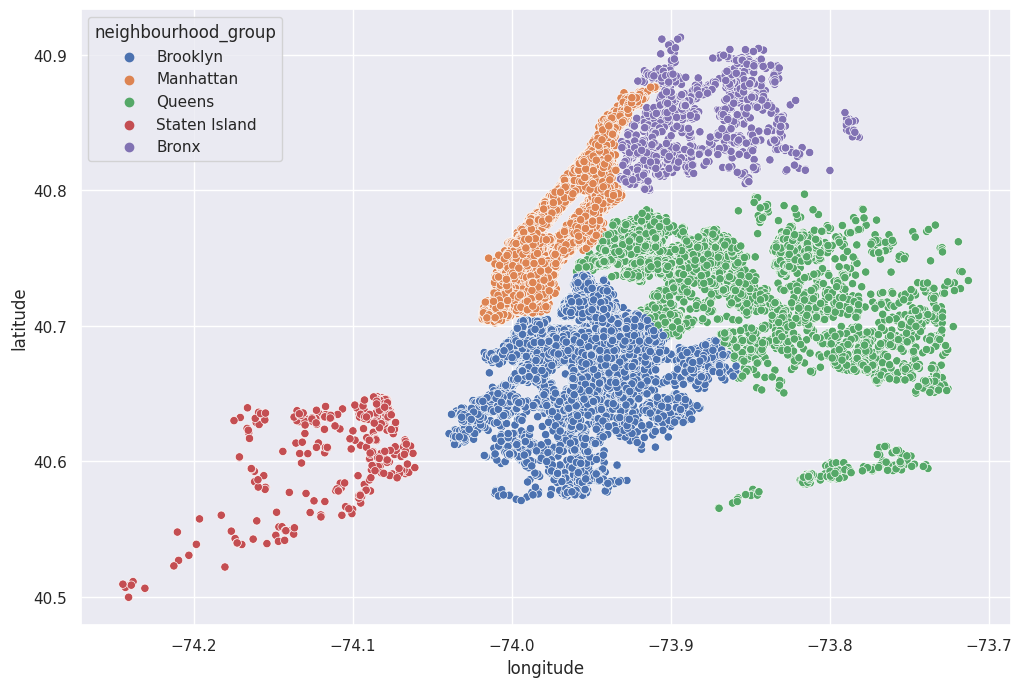

In [ ]:
# Scatter Plot to show the neighbourhood group based on Latitude and Longitude
# We will plot the same latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps.

plt.figure(figsize=(12,8))
sns.scatterplot(x=df_air.longitude,y=df_air.latitude,hue=df_air.neighbourhood_group)
plt.show()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df_air.shape

(48895, 16)

## ***2. Understanding Your Variables***

## **Exploring the Dataset**

### Dataset Columns

In [ ]:
# Dataset Columns

df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info

df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
#looks all the property ids are different and each listings are different here!

df_air['id'].nunique()

48895


- The dataset contains information about Airbnb listings in New York City.
- The data includes information such as the property name, host name, neighborhood, room type, price, minimum number of nights, number of reviews, last review date, reviews per month, calculated host listings count, and availability for the year.
- The dataset is large, with over 48,000 observations.
- The data is a mix of categorical and numerical variables.
- The **categorical variables** include the property name, host name, neighborhood, neighbourhood group, room type, and availability for the year.
- The **numerical variables** include the price, minimum number of nights, number of reviews, last review date, reviews per month, calculated host listings count, and latitude and longitude.
- As I have explored AirBNB Online Webside for this project, Im able to figure out that we have hosts who have single property hosted on AirBNB as well as there are hosts who have multiples properties hosted in their name.

In [ ]:
#  Filtering property name

df_air.loc[df_air['name']=='Clean & quiet apt home by the park']

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room    149   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   

   calculated_host_listings_count  availability_365  
0                               6               365

In [ ]:
# Filtering a particular host name

df_air[df_air['host_name']=='John']

id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
429      148201                  NYC - Sunny Greenwich Village 1br     715807   
620      234870                   Private Room With GREAT Location    1229984   
991      400039                 Big Beautiful Railroad in Brooklyn    1488809   
1141     484297        Large home in most desirable Brooklyn hood!    2397411   
...         ...                                                ...        ...   
47624  35836317                 Gorgeous Duplex 2BED/1.5BA  Modern  269242923   
47689  35871036  Huge 1 bedroom w/ a backyard near the heart of...  226414996   
47915  35984474                               Perfect Weekend Stay  229739739   
48212  36140542  Wonderful Summer Vacation  Getaways For Weeken...  229739739   
48705  36391615  Hidden gem! Cozy home in heart of Lower East Side   70653354   

      host_name neighbourhood_group      neighbourhood  latitude  longitude  \
0          John            Brooklyn         Kensington  40.64749  -73.97237   
429        John           Manhattan  Greenwich Village  40.72831  -74.00177   
620        John              Queens   Long Island City  40.74581  -73.95295   
991        John            Brooklyn           Bushwick  40.70339  -73.92945   
1141       John            Brooklyn       Clinton Hill  40.68545  -73.96534   
...         ...                 ...                ...       ...        ...   
47624      John           Manhattan           Kips Bay  40.74490  -73.97888   
47689      John              Queens   Ditmars Steinway  40.77170  -73.90799   
47915      John            Brooklyn           Flatbush  40.64726  -73.95455   
48212      John            Brooklyn           Flatbush  40.64600  -73.95455   
48705      John           Manhattan    Lower East Side  40.72013  -73.98769   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
429    Entire home/apt    175               3                 18  2013-05-31   
620       Private room     75              30                 65  2017-07-31   
991    Entire home/apt    130              30                 53  2017-06-30   
1141   Entire home/apt    350               4                 10  2018-09-12   
...                ...    ...             ...                ...         ...   
47624  Entire home/apt    288               5                  2  2019-06-30   
47689  Entire home/apt     90               3                  0         NaN   
47915     Private room     85              14                  0         NaN   
48212     Private room     85               7                  0         NaN   
48705  Entire home/apt    235               1                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
429                 0.19                               1                 0  
620                 0.74                               3               219  
991                 0.68                               1                 0  
1141                0.12                               1                 0  
...                  ...                             ...               ...  
47624               2.00                               1                74  
47689                NaN                               2                21  
47915                NaN                               2               176  
48212                NaN                               2               176  
48705                NaN                               1               349  

[294 rows x 16 columns]

In [ ]:
# filtering  total number of properties hosted or associated that particular host name

df_air[df_air['host_name']=='John']['name'].nunique()

293

In [ ]:
# Total Number of Destinations or unique neghbourhoods

df_air['neighbourhood'].nunique()

221

In [ ]:
# Total Number of hosts in our dataset

df_air['host_name'].nunique() #unique hosts

11452

In [ ]:
# Total Number of listings in the AirBNB dataset

df_air['name'].nunique()

47905

In [ ]:
# Number of listings with same listing name count in the 'name' column

df_air['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

- Few listings in our dataset have no particular host names mentioned
- Few listings have same listing names in name column but with different host name and different area.

In [ ]:
# filtering listings which have same property name and same host name in that particular listing or row.

df_air[df_air['name']==df_air['host_name']]

# we can remove duplicates later in our analysis.

id            name    host_id       host_name  \
9473    7264659         Olivier    6994503         Olivier   
10682   8212051           Monty   43302952           Monty   
16422  13186374            Sean   35143476            Sean   
23996  19348168             Cyn   74033595             Cyn   
24152  19456810  Hillside Hotel  134184451  Hillside Hotel   
24607  19785737  Hillside Hotel  134184451  Hillside Hotel   
26734  21231543  Hillside Hotel  134184451  Hillside Hotel   
26752  21243952  Hillside Hotel  134184451  Hillside Hotel   
26753  21244035  Hillside Hotel  134184451  Hillside Hotel   
26889  21311903  Hillside Hotel  134184451  Hillside Hotel   
26891  21312075  Hillside Hotel  134184451  Hillside Hotel   
26892  21312191  Hillside Hotel  134184451  Hillside Hotel   
26893  21312225  Hillside Hotel  134184451  Hillside Hotel   
26894  21312283  Hillside Hotel  134184451  Hillside Hotel   
26895  21312330  Hillside Hotel  134184451  Hillside Hotel   
26896  21312403  Hillside Hotel  134184451  Hillside Hotel   
26897  21312440  Hillside Hotel  134184451  Hillside Hotel   
26898  21312495  Hillside Hotel  134184451  Hillside Hotel   
26899  21312549  Hillside Hotel  134184451  Hillside Hotel   
26900  21312595  Hillside Hotel  134184451  Hillside Hotel   
26901  21312687  Hillside Hotel  134184451  Hillside Hotel   
26902  21312732  Hillside Hotel  134184451  Hillside Hotel   
27186  21488093             Rod  128142697             Rod   
33964  26895166    2018Serenity  202318295    2018Serenity   
43564  33718254        Imperial  249479517        Imperial   
45510  34803347              Yu  197052947              Yu   

      neighbourhood_group       neighbourhood  latitude  longitude  \
9473            Manhattan     Upper West Side  40.78931  -73.97520   
10682            Brooklyn       East Flatbush  40.66383  -73.92706   
16422            Brooklyn     Windsor Terrace  40.65182  -73.98043   
23996            Brooklyn  Bedford-Stuyvesant  40.67850  -73.91478   
24152              Queens           Briarwood  40.70454  -73.81549   
24607              Queens             Jamaica  40.70445  -73.81399   
26734              Queens             Jamaica  40.70428  -73.81353   
26752              Queens             Jamaica  40.70288  -73.81531   
26753              Queens             Jamaica  40.70319  -73.81410   
26889              Queens             Jamaica  40.70258  -73.81510   
26891              Queens             Jamaica  40.70333  -73.81380   
26892              Queens             Jamaica  40.70259  -73.81415   
26893              Queens             Jamaica  40.70262  -73.81526   
26894              Queens           Briarwood  40.70450  -73.81447   
26895              Queens           Briarwood  40.70458  -73.81418   
26896              Queens             Jamaica  40.70423  -73.81440   
26897              Queens             Jamaica  40.70269  -73.81585   
26898              Queens             Jamaica  40.70426  -73.81509   
26899              Queens             Jamaica  40.70262  -73.81579   
26900              Queens           Briarwood  40.70475  -73.81572   
26901              Queens           Briarwood  40.70471  -73.81542   
26902              Queens           Briarwood  40.70455  -73.81528   
27186           Manhattan     Upper East Side  40.76719  -73.96973   
33964           Manhattan         East Harlem  40.79424  -73.94290   
43564               Bronx           Soundview  40.82864  -73.87609   
45510           Manhattan    Roosevelt Island  40.76417  -73.94865   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9473   Entire home/apt    200               5                 12  2018-01-30   
10682      Shared room     95               2                  7  2015-10-30   
16422  Entire home/apt    400               7                  0         NaN   
23996     Private room     75               2                  1  2018-09-10   
24152     Private room     93               1  

In [ ]:
# Filtering few listings with same property name but hosted by different Airbnb hosts with different room_types & varied price ranges

df_air[df_air['name']=='New york Multi-unit building'].head(4)

id                          name    host_id host_name  \
2751    1489426  New york Multi-unit building    7964729    Justin   
19016  15100883  New york Multi-unit building   95623284     Pablo   
33473  26463879  New york Multi-unit building   21682640   Clarise   
34613  27457026  New york Multi-unit building  125320407      Sata   

      neighbourhood_group       neighbourhood  latitude  longitude  \
2751            Manhattan  Financial District  40.70582  -74.00888   
19016               Bronx             Fordham  40.86533  -73.89713   
33473            Brooklyn            Flatbush  40.64258  -73.95952   
34613              Queens             Jamaica  40.70653  -73.80561   

             room_type  price  minimum_nights  number_of_reviews last_review  \
2751   Entire home/apt    390               3                  1  2018-09-13   
19016     Private room     40               3                  1  2018-09-24   
33473     Private room     65              30                  0         NaN   
34613  Entire home/apt   1000               2                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
2751                 0.1                               1                 0  
19016                0.1                               1               179  
33473                NaN                               2               365  
34613                NaN                               5               365

In [ ]:
# filtering Same hosts have hosted for different properties in same neighbourhood groups!

df_air.loc[(df_air['neighbourhood_group']=='Manhattan') & (df_air['host_name']=='Natasha')]

id                                               name    host_id  \
4702    3304307                   Lovely Shiny Private Room in NYC   12465884   
4853    3458525                       Modern & Cozy 1BD Garden Apt   17430718   
8686    6673630                               Stylish L.E.S Studio    6591262   
9376    7193201                Private RM in Heart of East Village   33739627   
10310   7894907                        Cosy studio in East Village    1830864   
11344   8813547     For Christmas-Large New 1 BR Near Central Park   30350590   
20061  16066223      Spacious, quiet 1 br apt in beautiful Inwood!    1713011   
21145  16779705                           Cozy West Village Studio   11699846   
22125  17808917                  Gorgeous & Spacious UES apartment   85218001   
24200  19499668                   Cozy Sofa Bed in Upper Manhattan    3372118   
28787  22231811          Stylish & Spacious 1BD in Central Harlem!   17430718   
39111  30528541                       New york Multi-unit building   95575605   
40611  31494165  Sunny Cosy Private Room Hell's Kitchen & Broadway   33464426   
42630  33094220  Bright and Quiet near Union Square in the Village  249069377   
48452  36272531           Charming TriBeCa Loft - Avail for Summer  194377959   
48749  36417643    Luxury private room apt near Central Park (UES)   49796302   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
4702    Natasha           Manhattan         East Harlem  40.79269  -73.94218   
4853    Natasha           Manhattan              Harlem  40.81511  -73.94315   
8686    Natasha           Manhattan     Lower East Side  40.71661  -73.98916   
9376    Natasha           Manhattan        East Village  40.72896  -73.98430   
10310   Natasha           Manhattan        East Village  40.72395  -73.98001   
11344   Natasha           Manhattan    Theater District  40.76268  -73.98407   
20061   Natasha           Manhattan              Inwood  40.86757  -73.92699   
21145   Natasha           Manhattan   Greenwich Village  40.73239  -73.99960   
22125   Natasha           Manhattan     Upper East Side  40.77666  -73.95618   
24200   Natasha           Manhattan  Washington Heights  40.84133  -73.93739   
28787   Natasha           Manhattan              Harlem  40.81537  -73.94067   
39111   Natasha           Manhattan             Chelsea  40.74726  -73.99029   
40611   Natasha           Manhattan      Hell's Kitchen  40.76453  -73.98527   
42630   Natasha           Manhattan   Greenwich Village  40.73424  -73.99355   
48452   Natasha           Manhattan             Tribeca  40.72262  -74.00861   
48749   Natasha           Manhattan         East Harlem  40.79339  -73.93784   

             room_type  price  minimum_nights  number_of_reviews last_review  \
4702      Private room    100               3                 64  2019-06-01   
4853   Entire home/apt    115               3                 64  2019-06-19   
8686   Entire home/apt    150               3                  1  2015-08-01   
9376      Private room     99               1                  4  2015-10-24   
10310  Entire home/apt    150               2                 25  2016-07-22   
11344     Private room    230               5                 10  2016-09-10   
20061  Entire home/apt     89              14                 14  2019-05-13   
21145  Entire home/apt    103               2                 15  2018-10-28   
22125     Private room    105               2                  8  2018-06-16   
24200      Shared room     50               1                 21  2019-06-15   
28787  Entire home/apt    135               3                 21  2019-06-10   
39111  Entire home/apt    250               7                  0         NaN   
40611     Private room     80               3                  8  2019-05-29   
42630     Private room    120               1                  7  2019-06-12   
48452  Entire home/apt    250              21                  0         N

In [ ]:
# Top 4 host_ids with most listings counts

df_air['host_id'].value_counts()[:4]

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

Conclusion:
- Here We are trying to understand 2 variables that is name and host name & it's relationship with neighbourhood and neighbourhood group
- In our dataset there are hosts with only  one property listed in a particular neighbourhood of a neighbourhood group with same host id
 and there are hosts who has few number of properties listed in different neighbourhood groups with different host ids.
- Also the data so far tells, there might be cases where a particular host has co-hosted someone else's property/listing in a neighbourhood group on Airbnb.

### Overall summary statistics for all numerical columns

In [ ]:
# Dataset Describe

df_air.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

We can see from the above summary that  there are some property listed with 0 listed price!

In [ ]:
# Filtering total number of propertys/listings which have 0 price listed.

len(df_air[df_air['price']==0])

11

- While doing analysis tt's important to note that, if a person trying to book a listing for stay/rent he/she will look into these following factors while booking:
 - name, host_name, neighbourhood_group, neighbourhood, room_type,
 price, minimum_nights, number_of_reviews

In [ ]:
 # Top 5 hosts with most listings counts in entire NYC

df_air['host_name'].value_counts()[:5]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

### Variables Description

Answer Here

Variables Description

| Variable | Type | Description |
|---|---|---|
| id | Integer | Unique identifier for each listing |
| name | String | Name of the listing |
| host_id | Integer | Unique identifier for each host |
| host_name | String | Name of the host |
| neighbourhood_group | String | Neighbourhood group of the listing |
| neighbourhood | String | Neighbourhood of the listing |
| room_type | String | Type of room (e.g., Entire home, Private room, Shared room) |
| price | Float | Price per night for the listing |
| minimum_nights | Integer | Minimum number of nights that can be booked |
| number_of_reviews | Integer | Number of reviews for the listing |
| last_review | Date | Date of the last review |
| reviews_per_month | Float | Average number of reviews per month |
| calculated_host_listings_count | Integer | Number of listings hosted by the host |
| availability_365 | Integer | Number of days in the next 365 days that the listing is available |

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

### Price column data distribution

<ipython-input-152-09022a534406>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

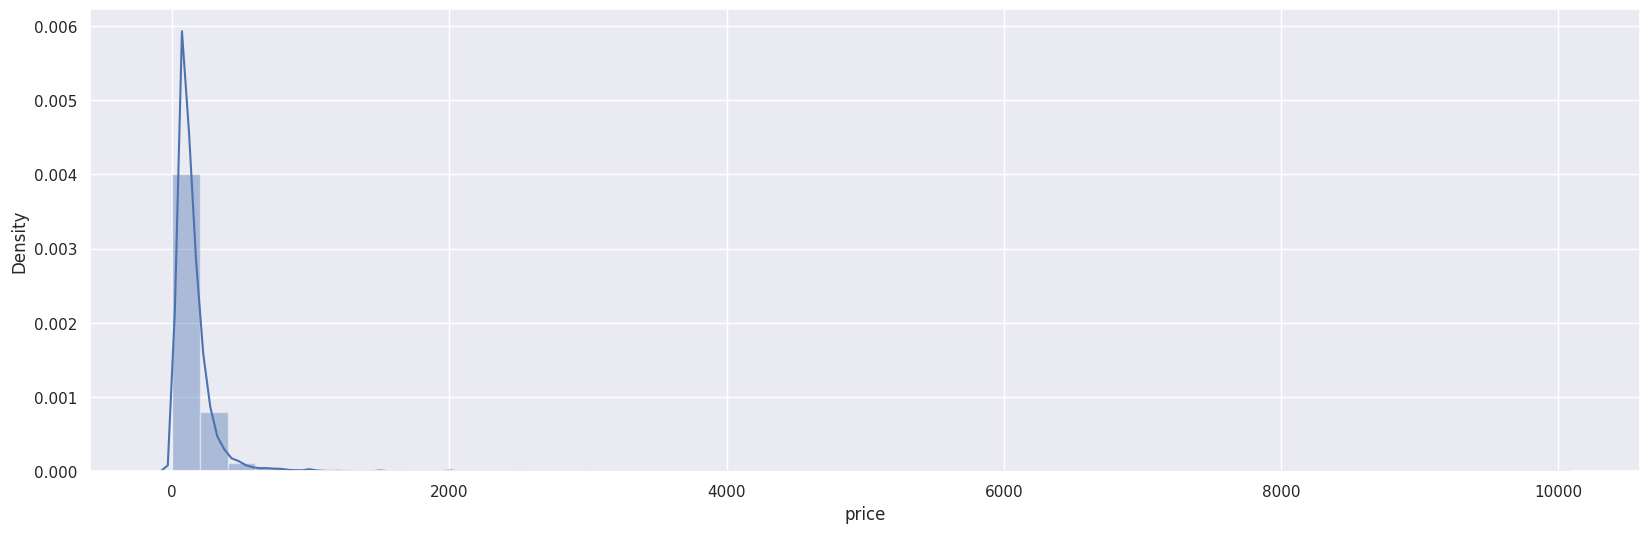

In [ ]:
# distplot

sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df_air['price'],hist=True)

The distribution tells it has positive skew
also the distribution doesn't deviate much from normal distribution.

In [ ]:
# skewness and kurtosis

print("Skewness: %f" % df_air['price'].skew())
print("Kurtosis: %f" % df_air['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


- The skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed.
- Also kurtosis looks high as well which indicates presence of outliers

### checking the relationship between numerical variables

#### Chart - 1

<Axes: xlabel='minimum_nights', ylabel='price'>

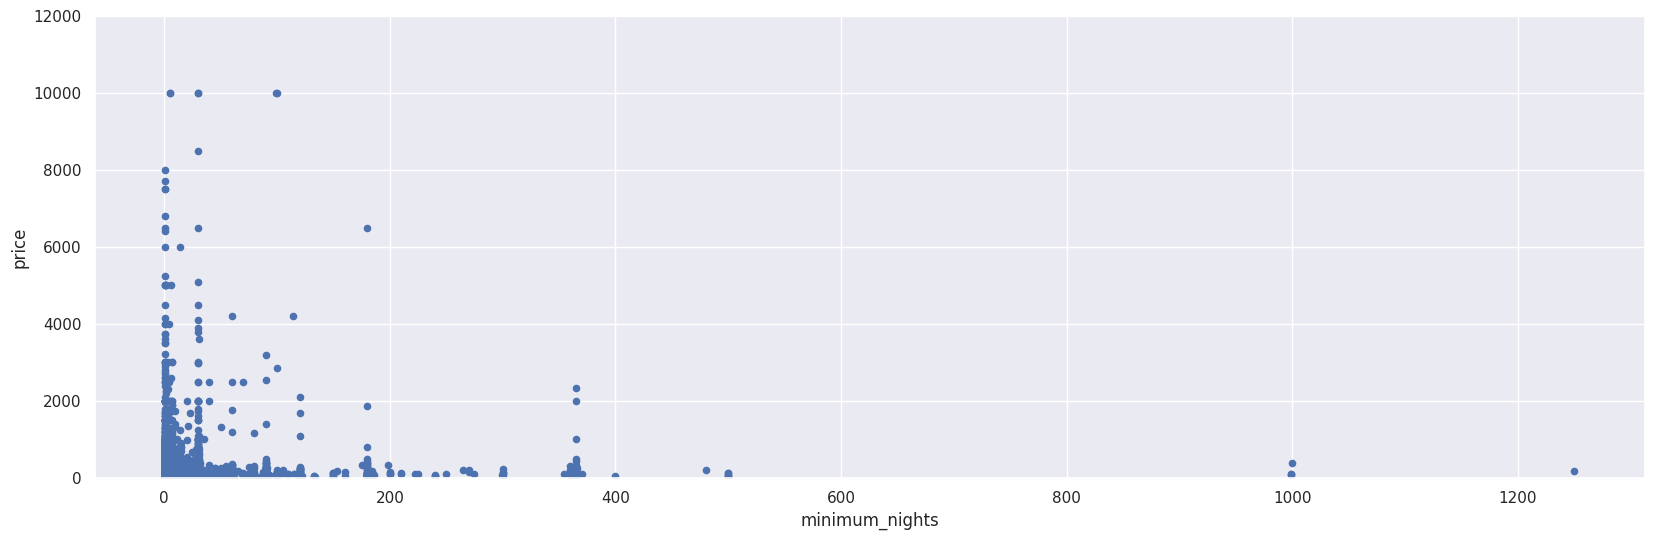

In [ ]:
# Bivariate - Visualising price and minimum_nights

var='minimum_nights'

data=pd.concat([df_air['price'],df_air[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000))

In [ ]:
# Multivariate - Visualising price, minimum_nights, neighbourhood

import plotly.express as px
fig = px.scatter(df_air, x="minimum_nights", y="price", color="neighbourhood_group")
fig.show()

- Many data points are clustured on 0 price range, few have min nights for stay but price is 0. looks like anomaly in price.
- There are many outliers as well.

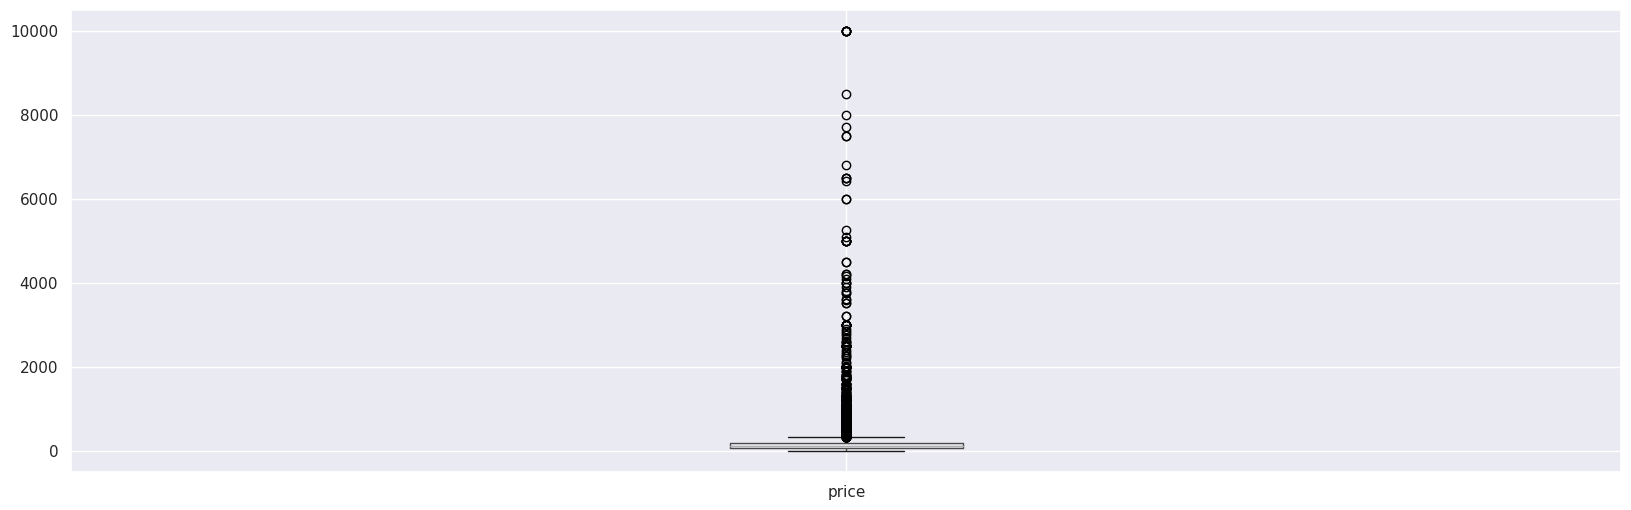

In [ ]:
# Boxplot visualisation on price column to detect outliers.

df_air.boxplot(column=['price'])
plt.show()


- There are many outliers present in our price column which we need to remove.

#### Chart - 2 - Correlation Heatmap

- Visualising the **correlation** matrix chart to understand how are the features interrelated with each other.<br>

- Also to get an idea which are the most important features in this data.


<ipython-input-157-106c6aeb7ae9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



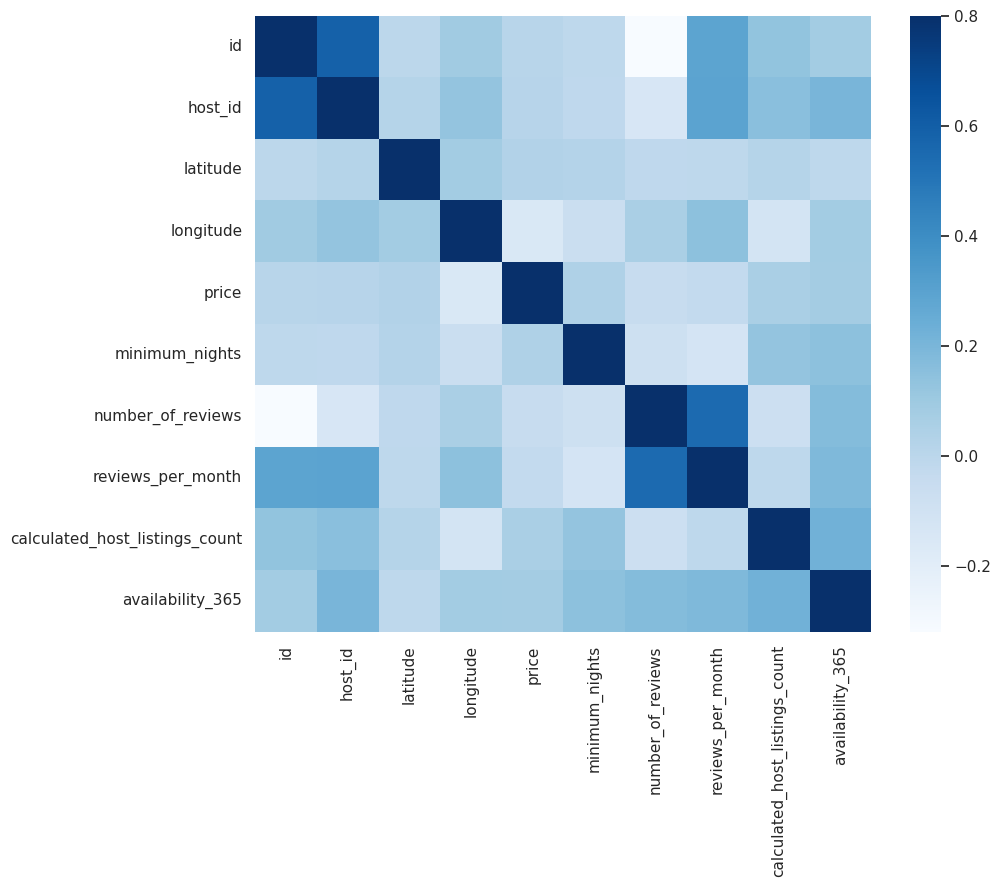

In [ ]:
# Correlation Heatmap visualization code

corrmat = df_air.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True,  cmap='Blues');

##### 1. Why did you pick the specific chart?

Answer Here.

- I picked the correlation heatmap because it is a useful visual tool for understanding the relationships between multiple variables.
- It can help to identify strong correlations, which can be useful for identifying patterns and trends in the data.
- It can also help to identify outliers, which can be useful for identifying unusual or unexpected data points.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- From the heatmap we can see that the correlation between different features that can affect a airbnb listing.

- There's correlation among host_id to reveiws_per_month & availability_365.
- Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

- no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365

### Data Pre-processing

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Visualizing the missing values

<Axes: >

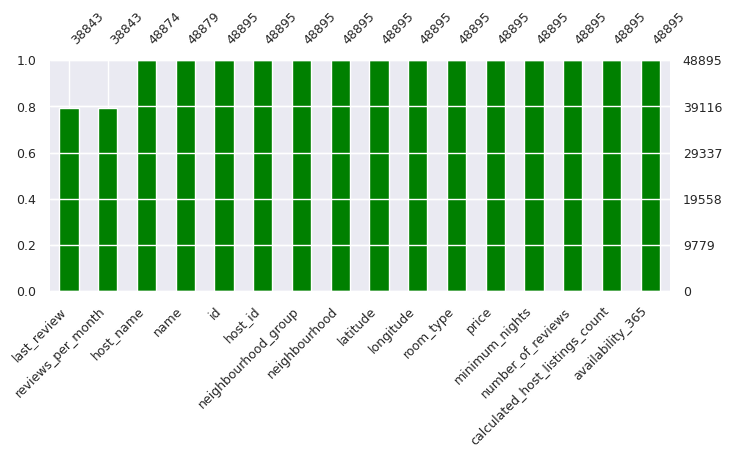

In [ ]:
import missingno as msno
msno.bar(df_air, color='green',sort='ascending', figsize=(8,3), fontsize=9)

**Missing values**

- As, host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns.

- Since both 'name' and 'host_name' has very less missing values as compared to 47,905 listings and 11452 unique hosts!
- we can fill these missing values in both with unknown & no_name respectively!


In [ ]:
# Filling missing values

df_air['name'].fillna('unknown',inplace=True)
df_air['host_name'].fillna('no_name',inplace=True)

In [ ]:
# Checking if there's any null values left

df_air[['host_name','name']].isnull().values.any()

False

In [ ]:
# Total Number of hosts

no_of_hosts= df_air['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')

# Total Number of property listings

no_of_listings= df_air['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11453
The total no of listings in NYC: 47906


Column 'last_review' has many null values. And since it's not much required for our analysis as compared to number_of_reviews & reviews_per_month. We're going to drop this column.

In [ ]:
# Dropping the column

df_air= df_air.drop(['last_review'],axis=1)

In [ ]:
# Updated dataset info

df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

#### Duplicate Values

Checking for duplicate data

In [ ]:
# Dataset Duplicate Value Count

duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]

0


Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

There's no duplicate data present in the dataset


---



In [ ]:
# Replacing NaN values of 'reviews_per_month' with 0 , as there mights be guests who didn't gave any ratings.

df_air['reviews_per_month']=df_air['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [ ]:
# Rechecking the column

df_air['reviews_per_month'].isnull().values.any()

False

### What did you know about your dataset?

Answer Here

- The dataset contains information about Airbnb listings in New York City.
- There are 47,905 listings in the dataset.
- The data is missing for the following columns:
 - host_name
 - name
 - last_review
 - reviews_per_month
- I used the following techniques to handle missing values:
  - I filled in the missing values for host_name and name with the strings "no_name" and "unknown", respectively.
  - I dropped the last_review column because it had a lot of missing values and was not essential for my analysis.
  - Replaced NaN values of reviews_per_month with 0
- I chose these techniques because they are simple and effective ways to handle missing values.

###Top 10 listings in NYC

In [ ]:
# top 10 listings on Airbnb in entire NYC

listings_count_df=df_air['name'].value_counts()[:10].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

Listings on Airbnb  Total_listings
0                              Hillside Hotel              18
1                         Home away from home              17
2                                     unknown              16
3                New york Multi-unit building              16
4                          Brooklyn Apartment              12
5                                Private Room              11
6            Loft Suite @ The Box House Hotel              11
7                                Private room              10
8  Artsy Private BR in Fort Greene Cumberland              10
9               Beautiful Brooklyn Brownstone               8

#### Chart - 3

In [ ]:
# visualisation of top 10 listings on Airbnb in entire NYC

import plotly.express as px
fig = px.bar(listings_count_df, x='Listings on Airbnb', y='Total_listings',color='Total_listings',
            title='Top 10 listings on Airbnb in entire NYC',
            labels={'Listings on Airbnb':'Top 10 Airbnb listings','Total_listings':'Number of listings'})
fig.update_layout(
    xaxis={'tickangle':45})
fig.show()

Hillside Hotel is found to have listed more listings in entire NYC, followed by Home away from Home.

In [ ]:
# Top 10 hosts on the basis of number of listings in entire NYC

top_10_hosts=df_air['host_name'].value_counts()[:10]

In [ ]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

#### Chart - 4

Text(0.5, 1.0, 'top 10 hosts on the basis of number of listings in entire NYC')

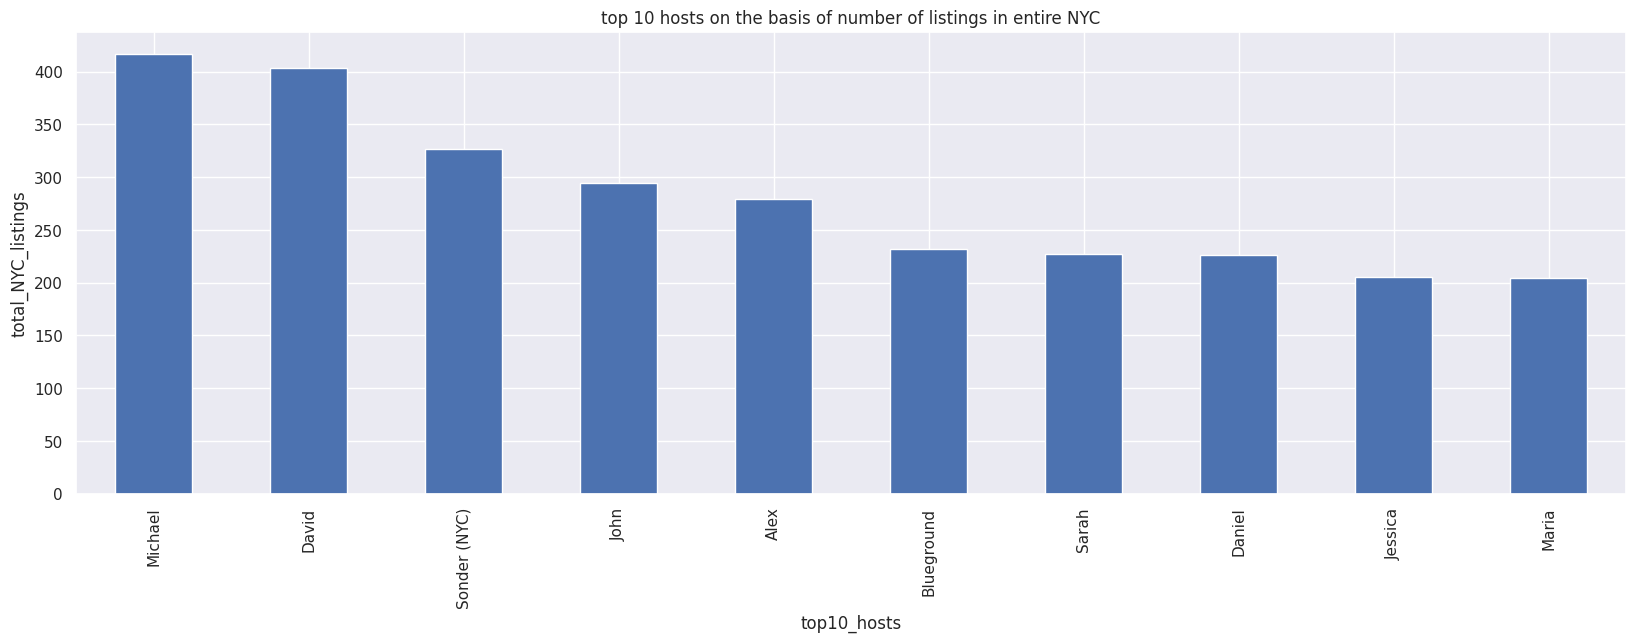

In [ ]:
# Visualisation of Top 10 hosts on the basis of number of listings in entire NYC

top_10_hosts.plot(kind='bar',color='b')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of number of listings in entire NYC')

Chart - 5

Text(0.5, 1.0, 'Count of number of listings in entire NYC of each neighbourhood group')

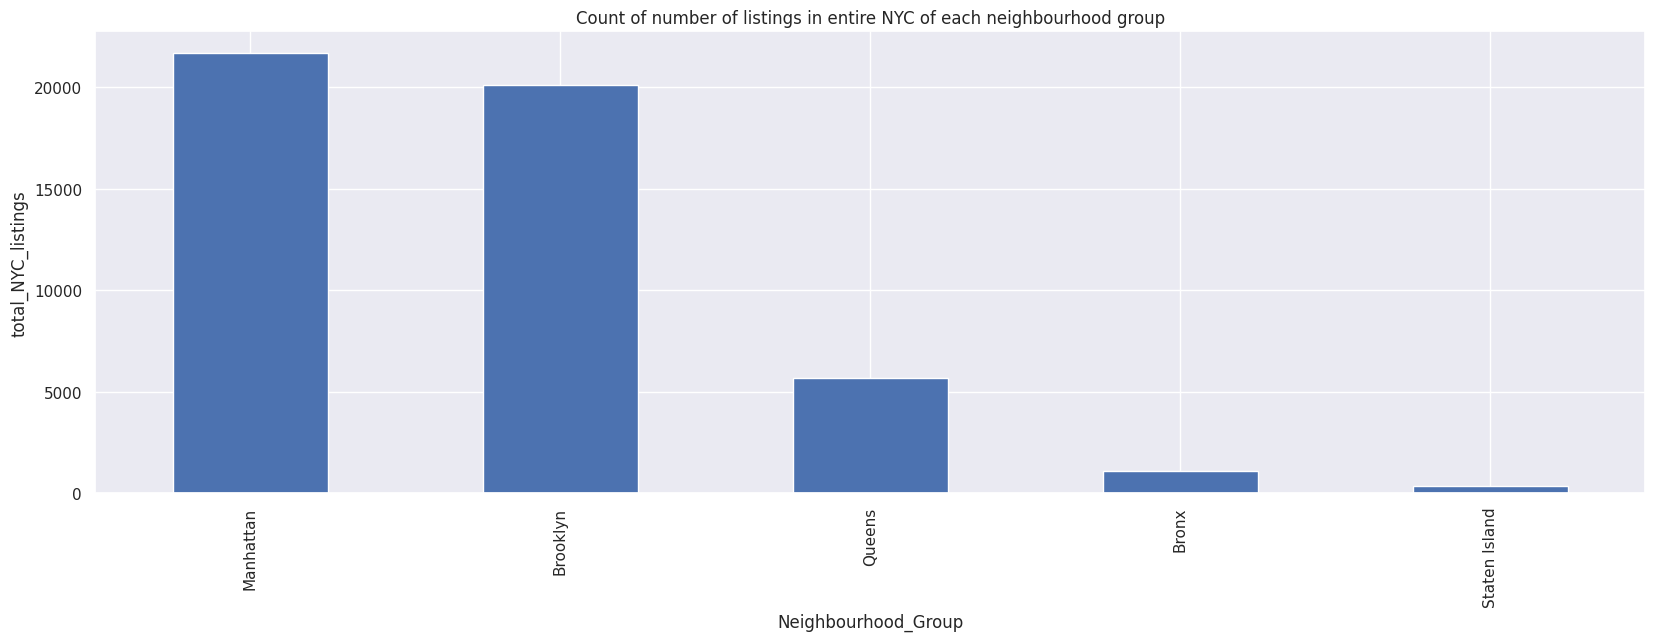

In [ ]:
# Visualising count of number of listings in entire NYC of each neighbourhood group

df_air['neighbourhood_group'].value_counts().plot(kind='bar',color='b')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of number of listings in entire NYC of each neighbourhood group')

- The neighbourhood group 'Manhattan' has the highest no of listings in entire NYC

In [ ]:
# Number of unique neighbourhoods in the dataset

df_air['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

#### Chart - 6

Text(0.5, 1.0, 'Top 10 neighbourhoods in entire NYC on the basis of count of listings')

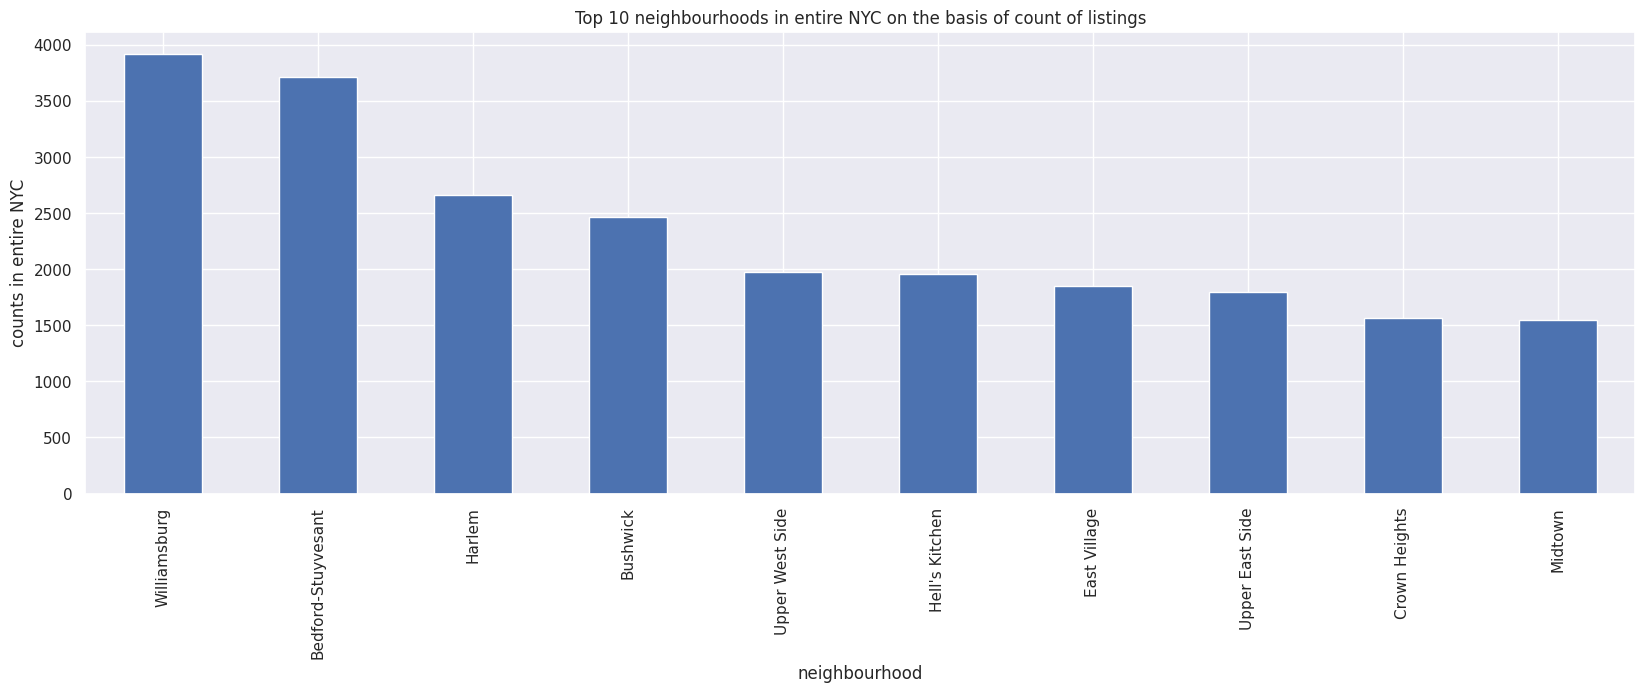

In [ ]:
# checking top 10 neighbourhoods on the basis of number of listings in entire NYC

top_10_neigbours= df_air['neighbourhood'].value_counts()[:10]
top_10_neigbours.plot(kind='bar',color='b')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top 10 neighbourhoods in entire NYC on the basis of count of listings')

Chart - 7

### Count of each room types in entire NYC

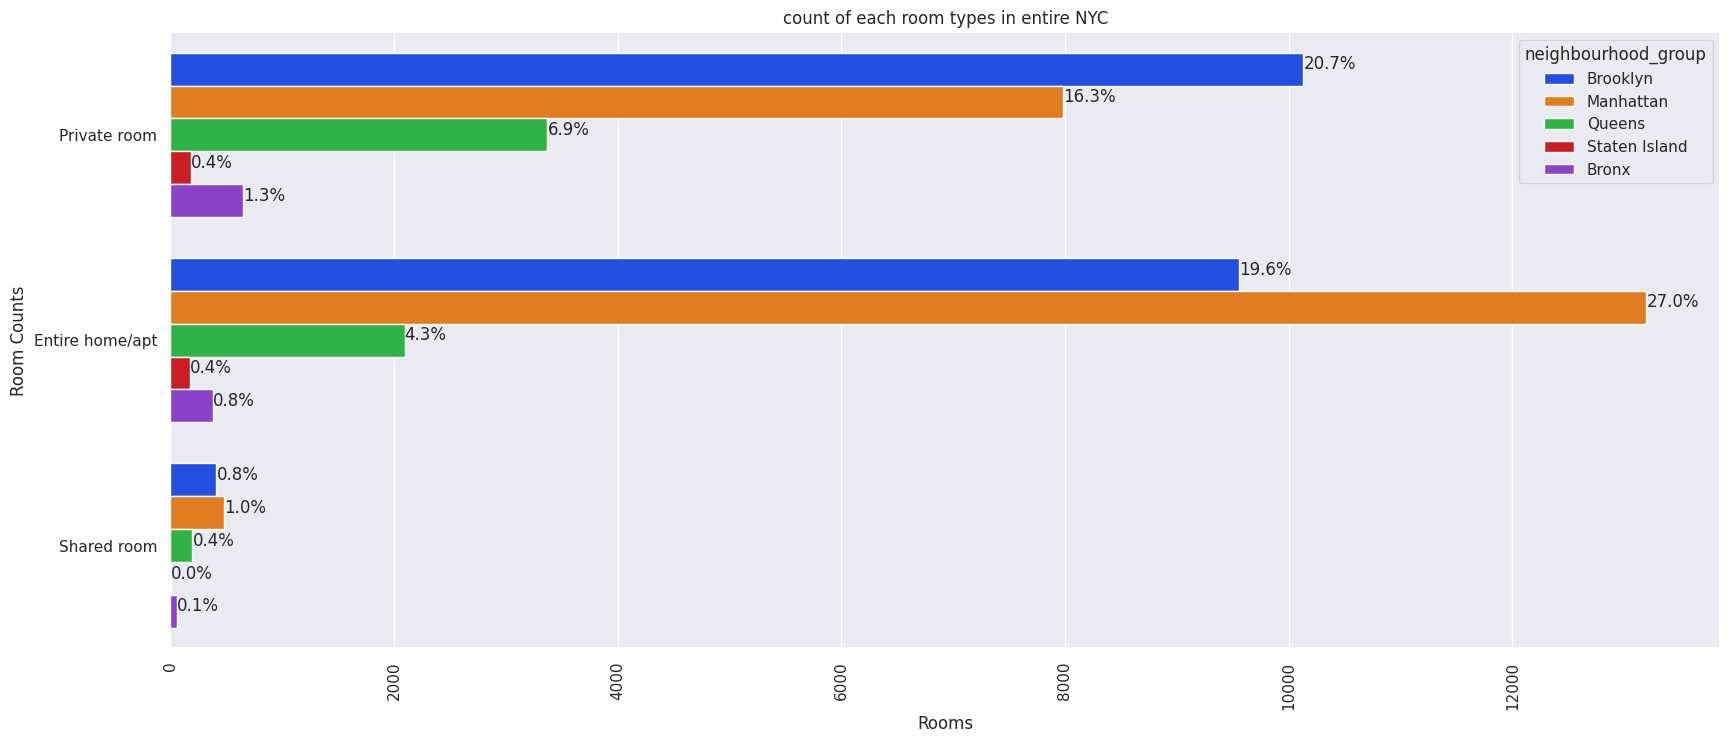

In [ ]:
# count of each room types in entire NYC

plt.rcParams['figure.figsize'] = (20, 8)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_air,palette='bright')

total = len(df_air['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

- Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

- Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

- Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

- We can infer that Brooklyn, Queens, Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

# Data distribution of the listings with availability

<Axes: xlabel='availability_365', ylabel='Count'>

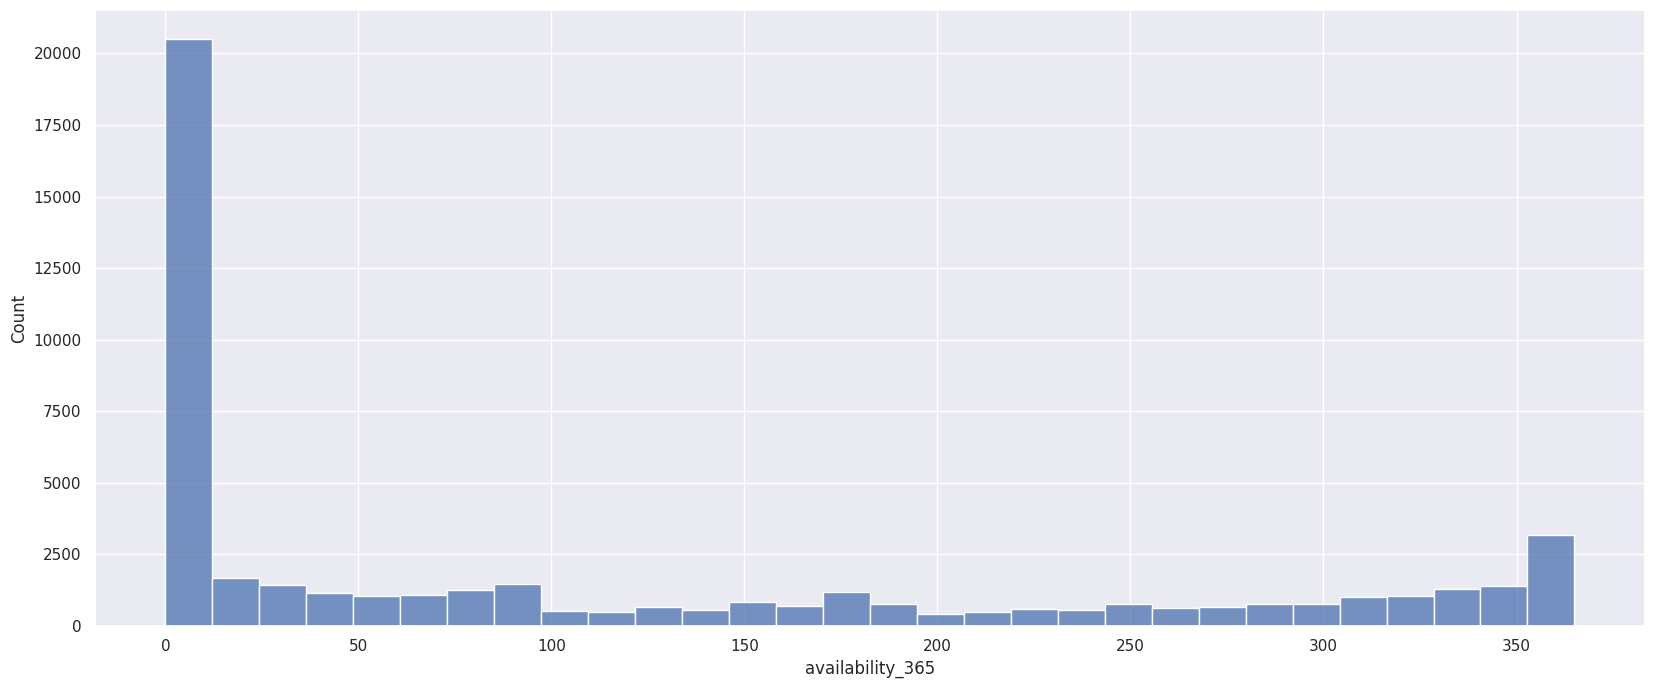

In [ ]:
# Distribution of listings availability at NYC

sns.histplot(df_air['availability_365'])

- Availability_365 have uniform distribution with availability ranging from 0 to 370

- The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)<br>

- Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

In [ ]:
# skewness and kurtosis

print("Skewness: %f" % df_air['availability_365'].skew())
print("Kurtosis: %f" % df_air['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


### Reviews/month distribution as per listings in NYC

<Axes: ylabel='Frequency'>

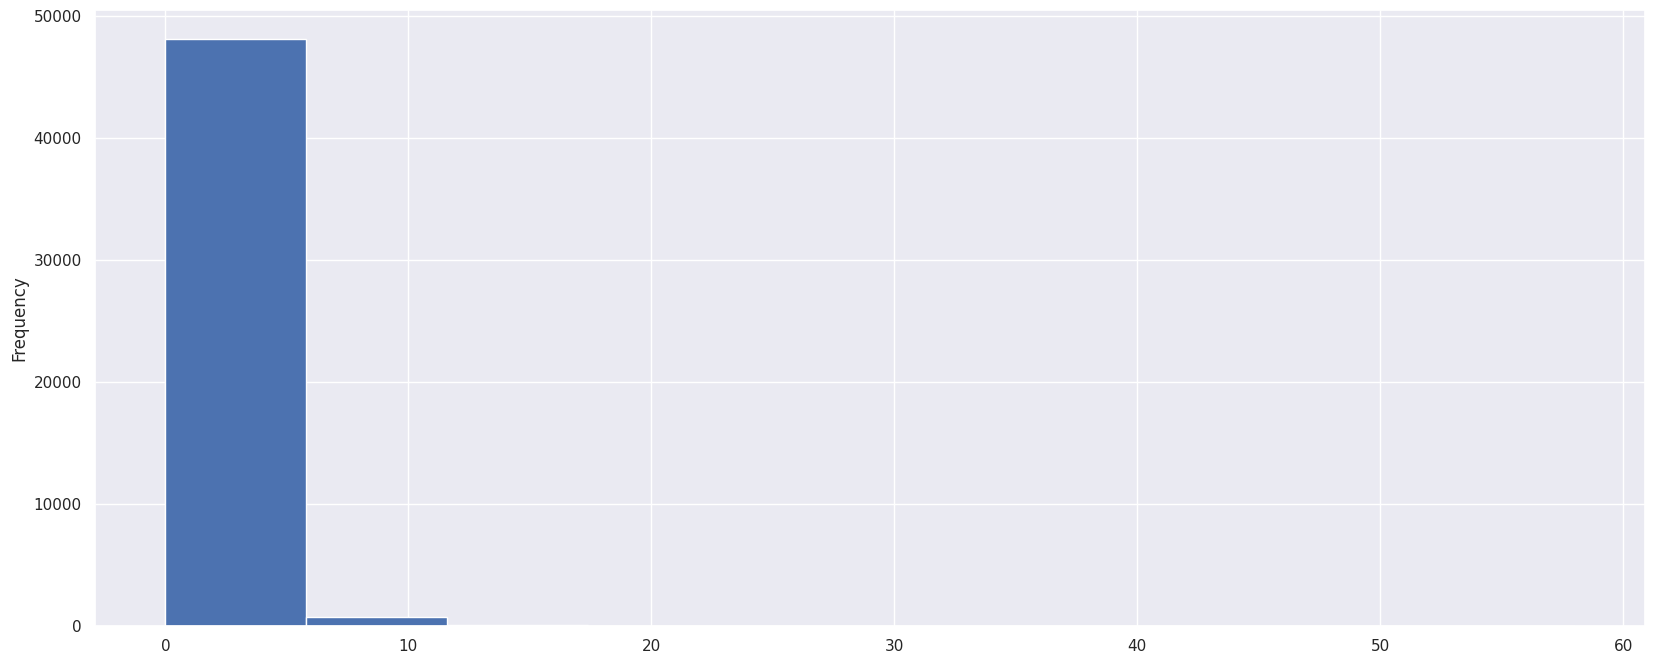

In [ ]:
# Visualisation of Reviews/month distribution as per listings in NYC in histplot

df_air['reviews_per_month'].plot.hist()

<ipython-input-181-d82b852b62bb>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='reviews_per_month', ylabel='Density'>

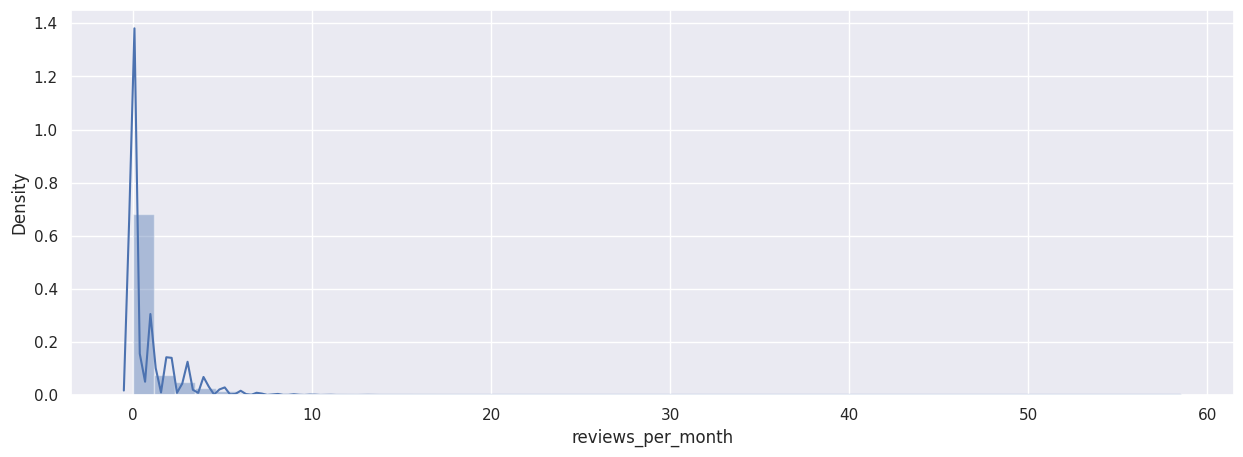

In [ ]:
# Visualisation of Reviews/month distribution as per listings in NYC in distplot

fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df_air['reviews_per_month'])

- Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.<br>

- Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [ ]:
# skewness and kurtosis

print("Skewness: %f" % df_air['reviews_per_month'].skew())
print("Kurtosis: %f" % df_air['reviews_per_month'].kurt())

Skewness: 3.751642
Kurtosis: 54.337612


- Both skewness and kurtosis are much high, indicates presence of large amount of outliers.

### Handling the outliers

<Axes: >

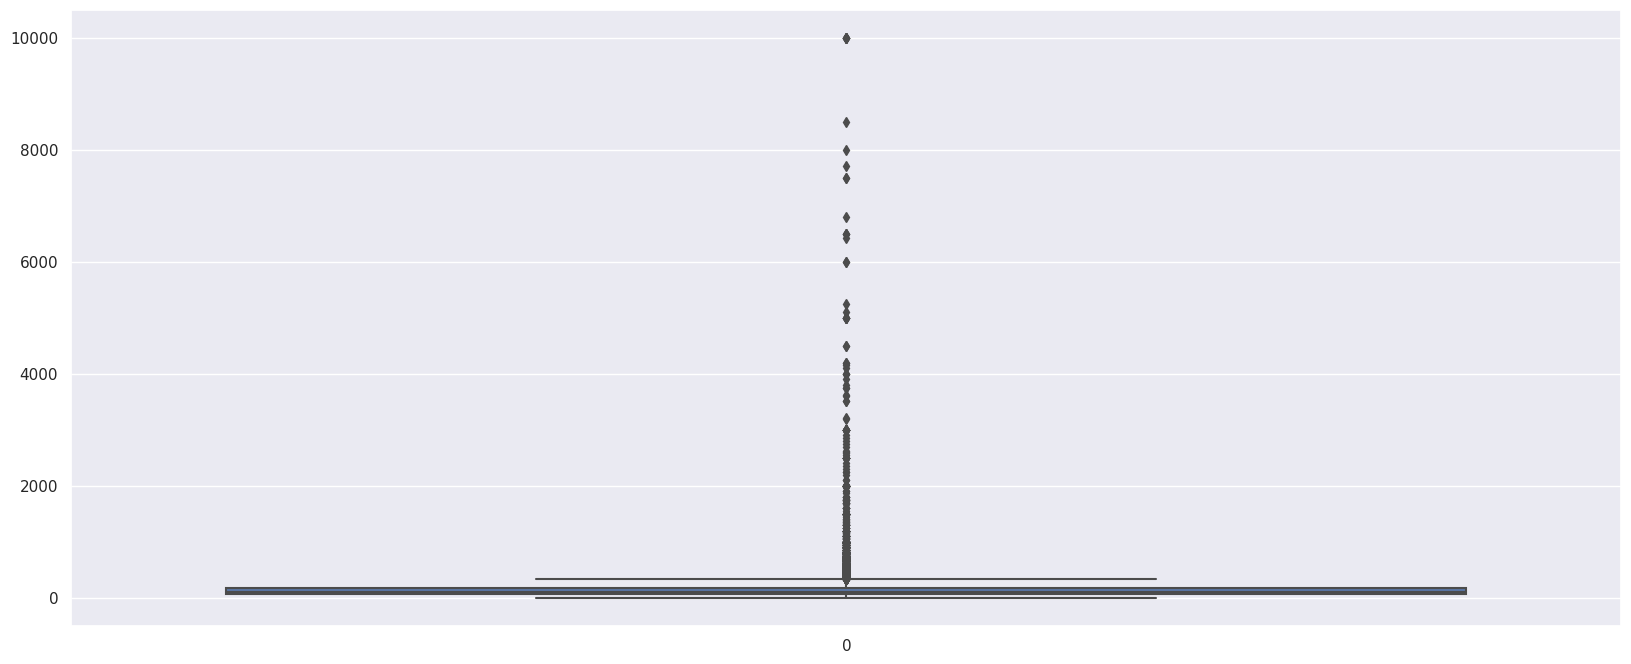

In [ ]:
# Boxplot for price column

sns.boxplot(df_air['price'])

In [ ]:
# Data description

df_air.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           0.806258   
std         20.510550          44.550582           1.502767   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.000000   
50%          3.000000           5.000000           0.000000   
75%          5.000000          24.000000           1.000000   
max       1250.000000         629.000000          58.000000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [ ]:
# using quantile approach to remove outliers.

In [ ]:
min_threshold,max_threshold= df_air.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [ ]:
 # prices less than min threshold

df_air[df_air.price<min_threshold]

id                                             name    host_id  \
957      375249                  Enjoy Staten Island Hospitality    1887999   
2675    1428154              Central, Peaceful Semi-Private Room    5912572   
2860    1620248    Large furnished 2 bedrooms- - 30 days Minimum    2196224   
3020    1767037               Small Cozy Room Wifi & AC near JFK    9284163   
3918    2431607                    Bright, Airy Room Share for 2    4973668   
...         ...                                              ...        ...   
48486  36280646                     Cable and wfi, L/G included.  272872092   
48647  36354776    Cozy bedroom in diverse neighborhood near JFK  273393150   
48832  36450814                         FLATBUSH HANG OUT AND GO  267223765   
48867  36473044  The place you were dreaming for.(only for guys)  261338177   
48868  36473253                     Heaven for you(only for guy)  261338177   

         host_name neighbourhood_group       neighbourhood  latitude  \
957    Rimma & Jim       Staten Island        Graniteville  40.62109   
2675       Tangier            Brooklyn            Flatbush  40.63899   
2860         Sally           Manhattan        East Village  40.73051   
3020       Antonio              Queens           Woodhaven  40.68968   
3918        Gloria            Brooklyn  Bedford-Stuyvesant  40.68642   
...            ...                 ...                 ...       ...   
48486        Chris              Queens        Forest Hills  40.73657   
48647         Liza              Queens       Richmond Hill  40.68639   
48832       Jarmel            Brooklyn            Flatbush  40.64922   
48867        Diana            Brooklyn           Gravesend  40.59080   
48868        Diana            Brooklyn           Gravesend  40.59118   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
957    -74.16534     Private room     20               3                 80   
2675   -73.95177      Shared room     29               2                  5   
2860   -73.98140  Entire home/apt     10              30                  0   
3020   -73.85219     Private room     29               2                386   
3918   -73.93440      Shared room     25               5                 76   
...          ...              ...    ...             ...                ...   
48486  -73.85088  Entire home/apt     16               9                  1   
48647  -73.81847     Private room     28               2                  0   
48832  -73.96078      Shared room     20               1                  0   
48867  -73.97116      Shared room     25               1                  0   
48868  -73.97119      Shared room     25               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
957                    0                               1               226  
2675                   0                               1               321  
2860                   0                               4               137  
3020                   5                               3                50  
3918                   1                               3               258  
...                  ...                             ...               ...  
48486                  1                               1               322  
48647                  0                               1                24  
48832                  0                               3               363  
48867                  0                               6               338  
48868                  0                               6               365  

[404 rows x 15 columns]

In [ ]:
 # Extreme price value above max_threshold

df_air[df_air.price>max_threshold]

id                                               name    host_id  \
1862     826690                   Sunny, Family-Friendly 2 Bedroom    4289240   
2698    1448703                Beautiful 1 Bedroom in Nolita/Soho      213266   
3537    2110145                 UWS 1BR w/backyard + block from CP    2151325   
3695    2224896                NYC SuperBowl Wk 5 Bdrs River View    11353904   
3720    2243699                SuperBowl Penthouse Loft 3,000 sqft    1483320   
3774    2271504                   SUPER BOWL Brooklyn Duplex Apt!!   11598359   
3788    2281142                 Prime NYC Location for Super Bowl     1427243   
4345    2919330                   NearWilliamsburg bridge 11211 BK   14908606   
4376    2952861                               Photography Location    1177497   
4377    2953058                                      Film Location    1177497   
6530    4737930                                 Spanish Harlem Apt    1235070   
9151    7003697                Furnished room in Astoria apartment   20582832   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown    3906464   
15560  12520066                 Luxury townhouse Greenwich Village   66240032   
17665  13882394        VIP Duplex Townhouse with Private Garden!!!   49186997   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
21821  17537893  The Otheroom Bar/Event/Filming Space -read det...   18037301   
22353  18051877                            Victorian Film location    2675644   
25825  20654227                                           Fulton 2  100069033   
25901  20692563    Greenwich Village Townhome with Private Garden!  147814925   
26739  21238053                                         Broadway 1  153497815   
28946  22296097   Chelsea Gallery Space for events and exhibitions    3750764   
28947  22296197   Chelsea Gallery for events, exhibitions, fashion    3750764   
29238  22436899                                1-BR Lincoln Center   72390391   
29662  22779726          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
29663  22779746          East 7th Street III by (Hidden by Airbnb)  156158778   
29664  22780103          Park Avenue Mansion by (Hidden by Airbnb)  156158778   
30268  23377410  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
34851  27629043             A Night at Anchor Aboard Yacht Ventura   45863742   
37194  29547314               Apartment New York \nHell’s Kitchens   35303743   
37864  29964348                 NYC HOLIDAY!!!!   April 15- May 15    2039658   
38000  30035166      4-Floor Unique Event Space 50P Cap. - #10299B  172611460   
39243  30589636     Furnished 1000sq large 2bed + office in Harlem  229458601   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
41216  32054910             West 88th Street by (Hidden by Airbnb)  156158778   
42523  33007610                70' Luxury MotorYacht on the Hudson    7407743   
42542  33029434             West 84th Street by (Hidden by Airbnb)  156158778   
42736  33171891  30 days minimum Time square West Midtown apart...  177396569   
43009  33397385    Midtown Manhattan great location (Gramacy park)   16105313   
43670  33796251   Beautiful private Brooklyn room with kitchenette    8748976   
44034  33998396                   3000 sq ft daylight photo studio    3750764   
45666  34895693                               Gem of east Flatbush  262534951   
45867  34981637        bay ridge & sunset park furnished apartment  263564234   
46614  35345358                     Northside Williamsburg Stunner     956324   
48043  36056808       Luxury TriBeCa Apartment at an amazing price  271248669   

         host_name neighbourhood_group       neighbourhood  latitude  \
1862          Lucy            Brooklyn    Prospect Heights  40.67919   
2698       Jessica           Manhattan              Nolita  40.72193   
3537   Jay And Liz           Manhattan     Upper West Side  40.77782  

In [ ]:
df_air_pnw= df_air[(df_air.price>min_threshold)&(df_air.price<max_threshold)]

<ipython-input-190-1a27b1e389fe>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

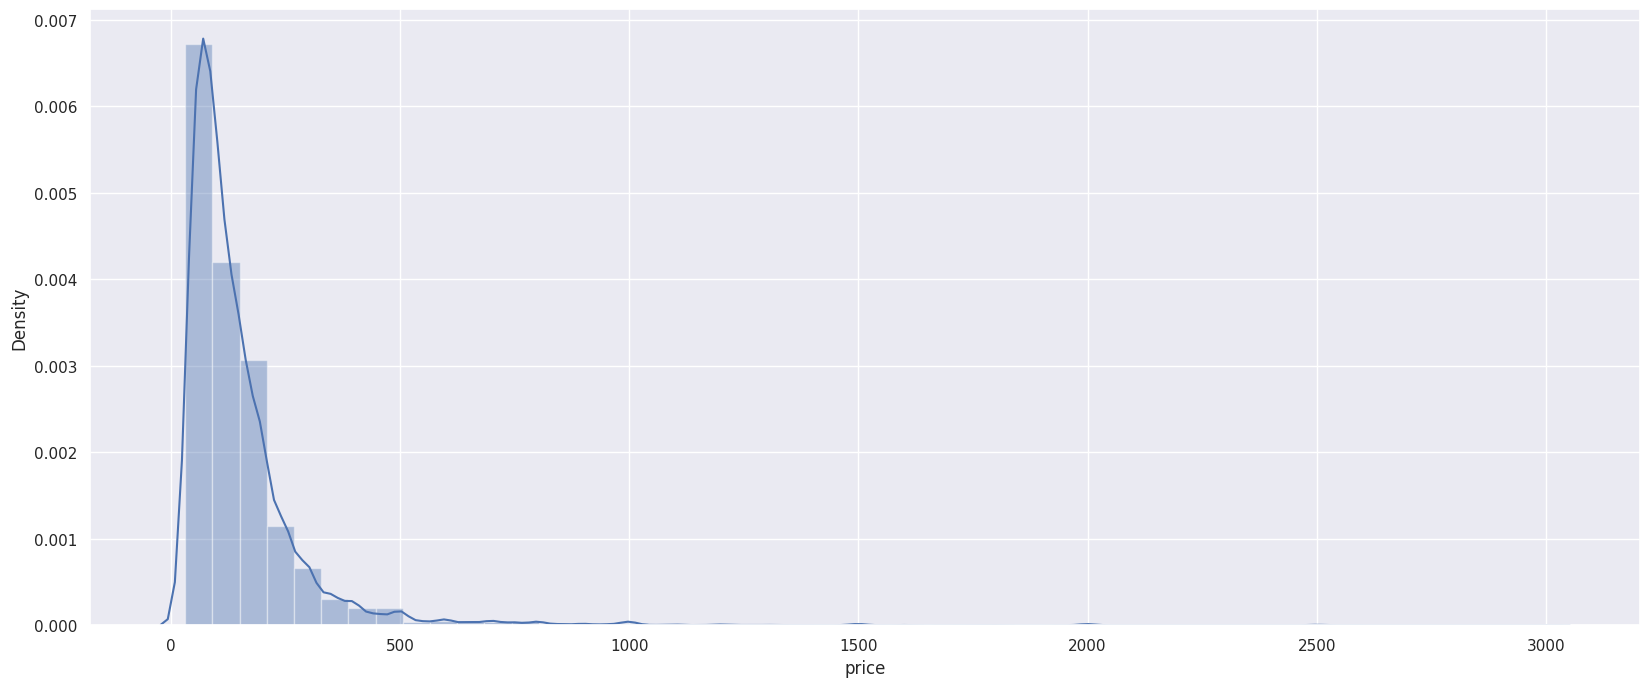

In [ ]:
sns.distplot(df_air_pnw['price'])

<Axes: >

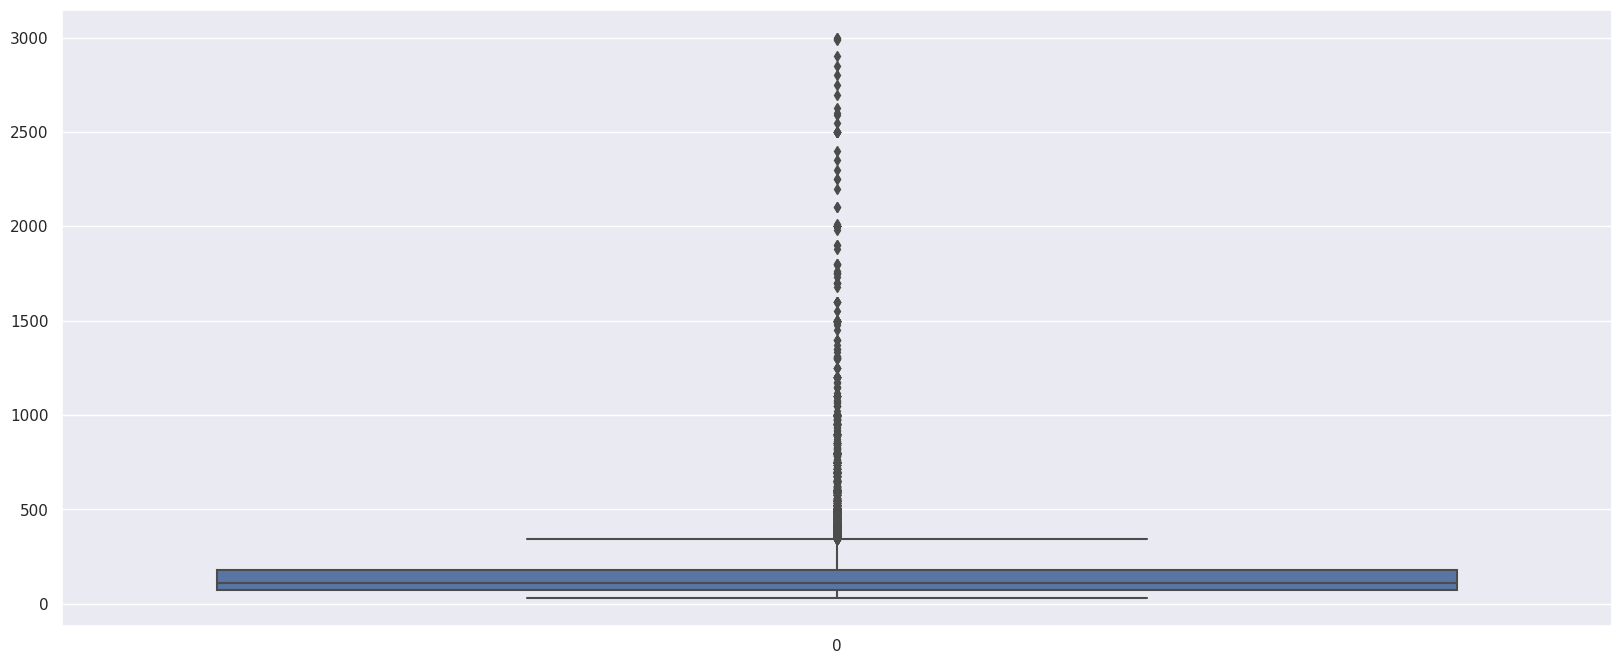

In [ ]:
 # looks there are still many outliers

sns.boxplot(df_air_pnw['price'])

In [ ]:
#skewness and kurtosis

print("Skewness: %f" % df_air_pnw['price'].skew())
print("Kurtosis: %f" % df_air_pnw['price'].kurt())

Skewness: 6.378314
Kurtosis: 70.394436


### Removing Outliers using IQR approach (has performed best in removing outliers)



In [ ]:
# trying removing outliers using IQR

In [ ]:
Q1 = df_air.quantile(0.25)
Q3 = df_air.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


<ipython-input-194-fc656a789831>:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-194-fc656a789831>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# writing a outlier function for removing outliers

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)

 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df_air['price'])

In [ ]:
 # looking at the low and upper range outliers

df_air[(df_air.price < lower_bound) | (df_air.price > upper_bound)]

id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
85        19601                perfect for a family or small group      74303   
103       23686  2000 SF 3br 2bath West Village private  townhouse      93790   
114       26933  2 BR / 2 Bath Duplex Apt with patio! East Village      72062   
121       27659                   3 Story Town House in Park Slope     119588   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 stops from Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt in the Best Location of FiDi   29741813   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   
48842  36453160  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...  224171371   
48856  36457700  Large 3 bed, 2 bath , garden , bbq , all you need   66993395   

                     host_name neighbourhood_group       neighbourhood  \
61                       Petra           Manhattan             Chelsea   
85                      Maggie            Brooklyn    Brooklyn Heights   
103                        Ann           Manhattan        West Village   
114                      Bruce           Manhattan        East Village   
121                       Vero            Brooklyn         South Slope   
...                        ...                 ...                 ...   
48758                LaGabrell              Queens    Long Island City   
48833                      Yue           Manhattan  Financial District   
48839                  Richard            Brooklyn      Sheepshead Bay   
48842  LuxuryApartmentsByAmber           Manhattan             Chelsea   
48856                   Thomas            Brooklyn  Bedford-Stuyvesant   

       latitude  longitude        room_type  price  minimum_nights  \
61     40.74623  -73.99530  Entire home/apt    375             180   
85     40.69723  -73.99268  Entire home/apt    800               1   
103    40.73096  -74.00319  Entire home/apt    500               4   
114    40.72540  -73.98157  Entire home/apt    350               2   
121    40.66499  -73.97925  Entire home/apt    400               2   
...         ...        ...              ...    ...             ...   
48758  40.75508  -73.93258  Entire home/apt    350               2   
48833  40.70605  -74.01042  Entire home/apt    475               2   
48839  40.59866  -73.95661     Private room    800               1   
48842  40.75204  -74.00292  Entire home/apt    350               1   
48856  40.68886  -73.92879  Entire home/apt    345               4   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
61                     5                  0                               1   
85                    25                  0                               1   
103                   46                  0                               2   
114                    7                  0                               4   
121                   16                  0                               2   
...                  ...                ...                             ...   
48758                  0                  0                               1   
48833                  0                  0                               1   
48839                  0                  0                               1   
48842                  0                  0                               1   
48856                  0                  0                               3   

       availability_365  
61                  180  
85                    7  
103                 243  
114                 298  
121                 216  
...                 ...  
48758               364  
48833                64  
48839                23  
48842                 9  
48856               354  

[2972 rows x 15 columns]

In [ ]:
# subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively

df_air_pnw1 = df_air[(df_air.price>lower_bound) & (df_air.price<upper_bound)]

In [ ]:
df_air_pnw1

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                      0                               6               365  
1                      0                               2               355  
2                      0                               1               365  
3                      4                               1               194  
4                      0                               1                 0  
...                  ...                             ...               ...  
48890                  0                               2                 9  
48891                  0                               2                36  
48892                  0                               1                27  
48893                  0                               6                 2  
48894                  0                               1                23  

[45918 rows x 15 columns]

<Axes: >

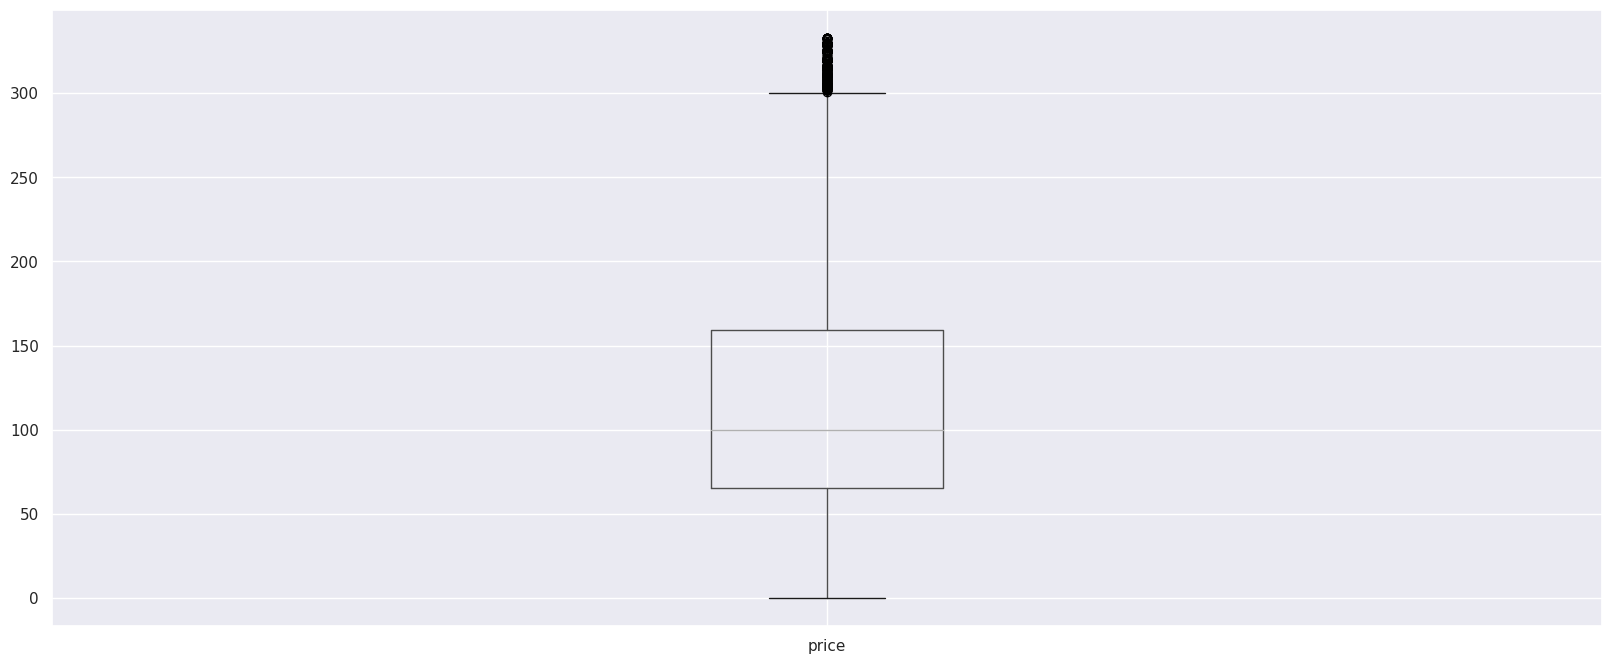

In [ ]:
# the boxplot has no outliers for price

df_air_pnw1.boxplot(column='price')

In [ ]:
#skewness and kurtosis

print("Skewness: %f" % df_air_pnw1['price'].skew())
print("Kurtosis: %f" % df_air_pnw1['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


checking updated price column now.

<ipython-input-202-7ae07191cc43>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

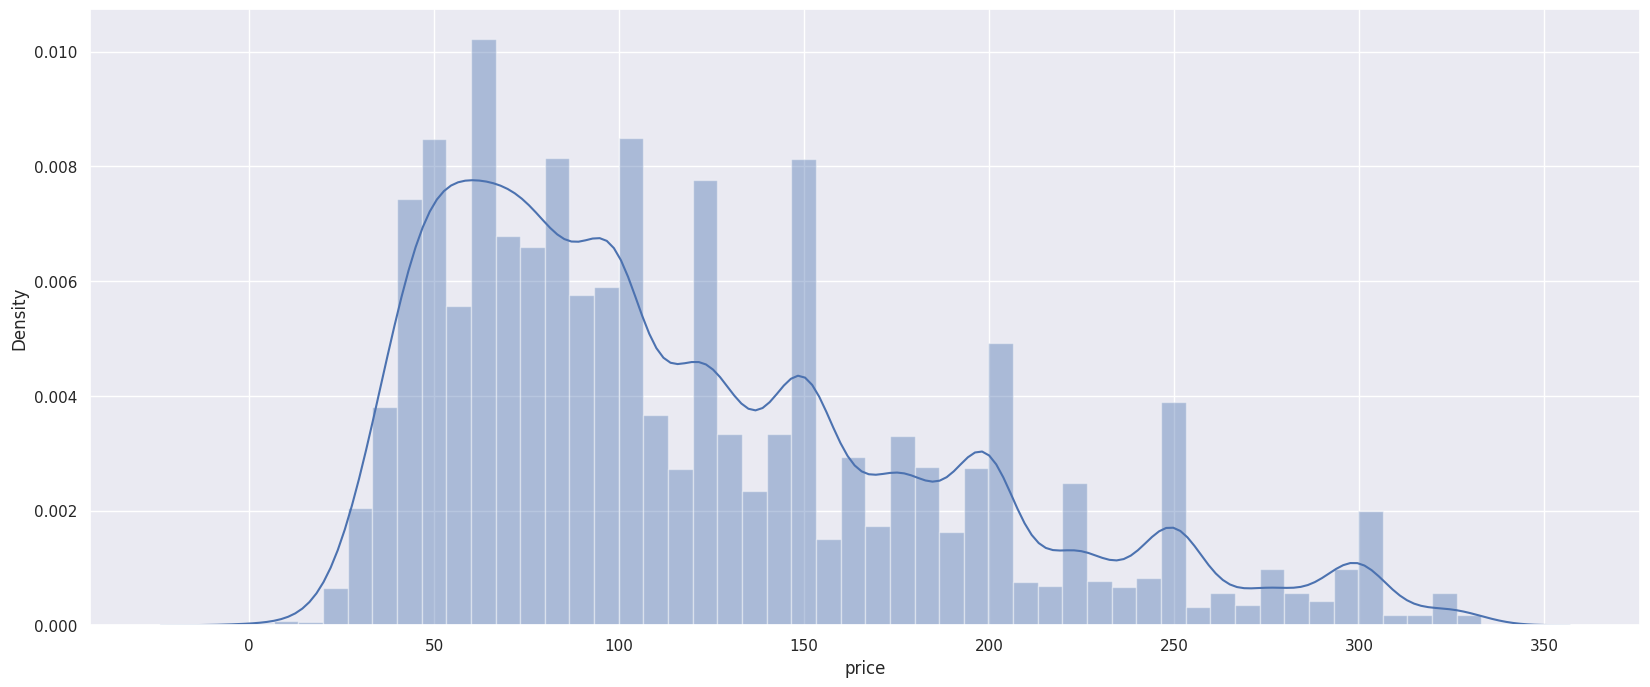

In [ ]:
# visualisation

sns.distplot(df_air_pnw1['price'])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Bi-variate Analysis!**

 Now we are going to understand the distribution of price column after removing outliers along neighbourhood groups

In [ ]:
# Neighbourhood value counts in the dataset

df_air_pnw1['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

#### Chart - 8

**Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-**

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group. <br>

We can do a seaborn point plot to get the average prices/neighbourhood in NYC!

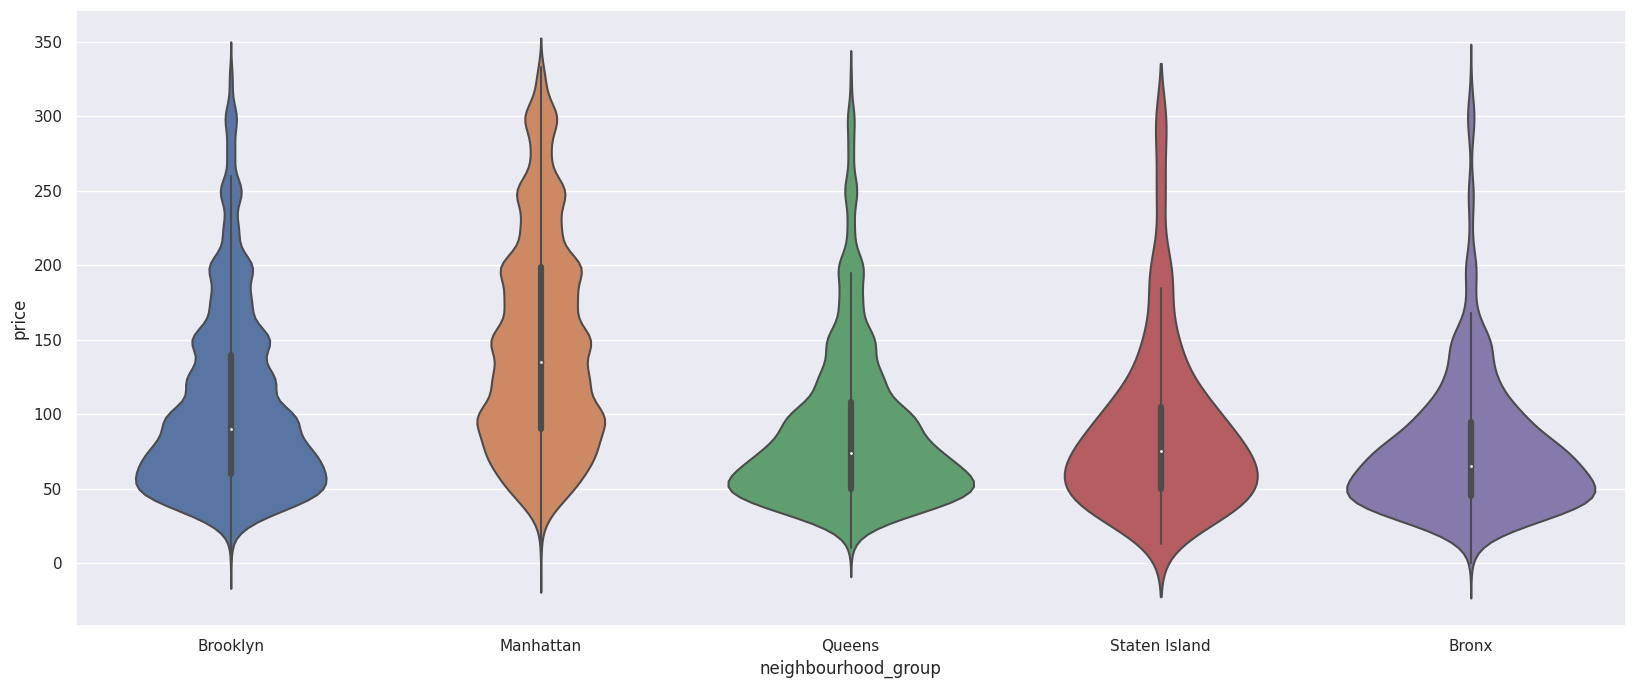

In [ ]:
# Visualisatiom of price with respect to neighbourhoods_groups

ax= sns.violinplot(x='neighbourhood_group',y='price',data=df_air_pnw1)

##### 1. Why did you pick the specific chart?

Answer Here.



- The violin plot was chosen to visualize the distribution of price across Manhattan, Brooklyn, Queens, Bronx & Staten Island because it provides a better representation of the data than a bar chart or histogram.
- A violin plot shows the distribution of data in a single plot, making it easy to compare the different distributions of each neighbourhood group.
- Additionally, the violin plot allows for the identification of outliers and the skewness of the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

- As usual Manhattan being the most costliest place to live in, have price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings.

- Queens, Staten Island are on the same page with price on listings.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

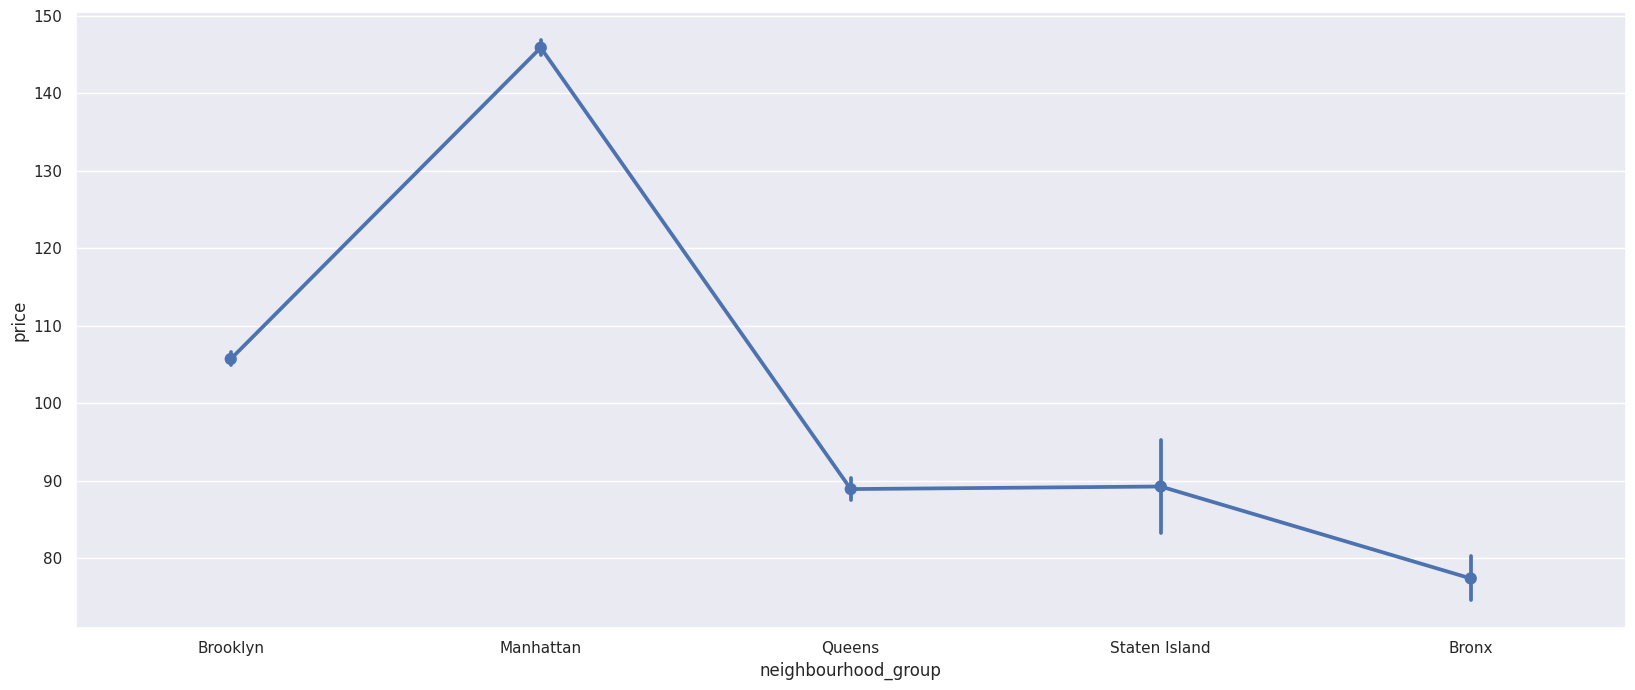

In [ ]:
# the average price each neighbourhood groups holds in a seaborn pointplot

sns.pointplot(x = 'neighbourhood_group', y='price', data=df_air_pnw1, estimator=mean)

##### 1. Why did you pick the specific chart?

Answer Here.

- The pointplot was chosen to visualize the average price each neighbourhood groups holds in a seaborn pointplot because it is a simple and effective way to visualize the relationship between two variables.
- A pointplot shows the average value of one variable (in this case, price) for each category of another variable (in this case, neighbourhood_group).
- This type of plot is often used to compare the average values of a variable across different categories.
- In this case, the pointplot shows that Manhattan has the highest average price, followed by Brooklyn, Queens, Staten Island, and the Bronx.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We can see that **Manhattan** has the highest(the costliest) average of price ranging to ~150dollars/day followed by **Brooklyn** <br>

**Queens** and **Staten Island** have same average price/day, while **Bronx** comes out to be the cheapest neighbourhood group in NYC.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here



- The insights gained from the visualizations can be used to make informed decisions about pricing and marketing strategies for Airbnb listings in New York City.

- For example, the insights that Manhattan has the highest average price and Brooklyn has the second highest average price can be used to target these neighborhoods with higher prices for listings.

- Additionally, the insights that Queens and Staten Island have the same average price and the Bronx has the lowest average price can be used to target these neighborhoods with lower prices for listings.

- Overall, the insights gained from the visualizations can help Airbnb hosts to optimize their pricing strategies and increase their revenue.


# **Expensive & cheapest listings with respect to prices leading in entire NYC!**

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

**The costliest?**

In [ ]:
# Top 5 Costly listings

df_air_pnw.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

name neighbourhood_group  \
38498                 LUXURIOUS 5 bedroom, 4.5 bath home           Manhattan   
48304      Next to Times Square/Javits/MSG! Amazing 1BR!           Manhattan   
46533                          Amazing Chelsea 4BR Loft!           Manhattan   
30824  Designer's Beautiful 2BR Apartment in NOLITA/SOHO           Manhattan   
22992  Modern Townhouse for Photo, Film &  Daytime Ev...           Manhattan   

         neighbourhood        host_name        room_type  
38498  Upper West Side             Lisa  Entire home/apt  
48304   Hell's Kitchen          Rogelio  Entire home/apt  
46533          Chelsea         Viberlyn  Entire home/apt  
30824           Nolita  Ilo And Richard  Entire home/apt  
22992  Upper West Side            Lanie  Entire home/apt

Again top 5 costliest listings belongs to **Manhattan** itself(being the most costliest place of living in NYC)

**The cheapest?**

In [ ]:
# Top 5 least expensive listings

df_air_pnw.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

name neighbourhood_group  \
12516          cute and cozy room in brooklyn            Brooklyn   
7864               Comfortable and Large Room            Brooklyn   
29967           Large bed room share bathroom              Queens   
39100          15 minutes From Times Square!!           Manhattan   
28700  Cozy room in Loft Apartment - Brooklyn              Queens   

            neighbourhood host_name     room_type  
12516  Bedford-Stuyvesant   Ornella  Private room  
7864             Flatbush       Kay  Private room  
29967            Elmhurst       Cha  Private room  
39100  Washington Heights       Ari  Private room  
28700           Ridgewood  Estefani  Private room

Also, the cheapest listings mostly comes from **Brooklyn**, **Queens** and all are private rooms which makes sense.

# Top neighbourhoods in NYC with respect to average price/day of Airbnb listings

let's check for the neighbourhoods with listings having highest average price/day in each neighbourhood groups of NYC!

In [ ]:
#  Top neighbourhoods in NYC with respect to average price/day of Airbnb listings

df_ngrp= df_air_pnw.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [ ]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

neighbourhood_group   neighbourhood       price
188       Staten Island  Fort Wadsworth  800.000000
88             Brooklyn        Sea Gate  487.857143
34                Bronx       Riverdale  442.090909
121           Manhattan         Tribeca  410.531429
163              Queens        Neponsit  274.666667

#### Chart - 9

### Top Neighbourhoods in each neighbourhood groups in NYC

Text(0, 0.5, 'price')

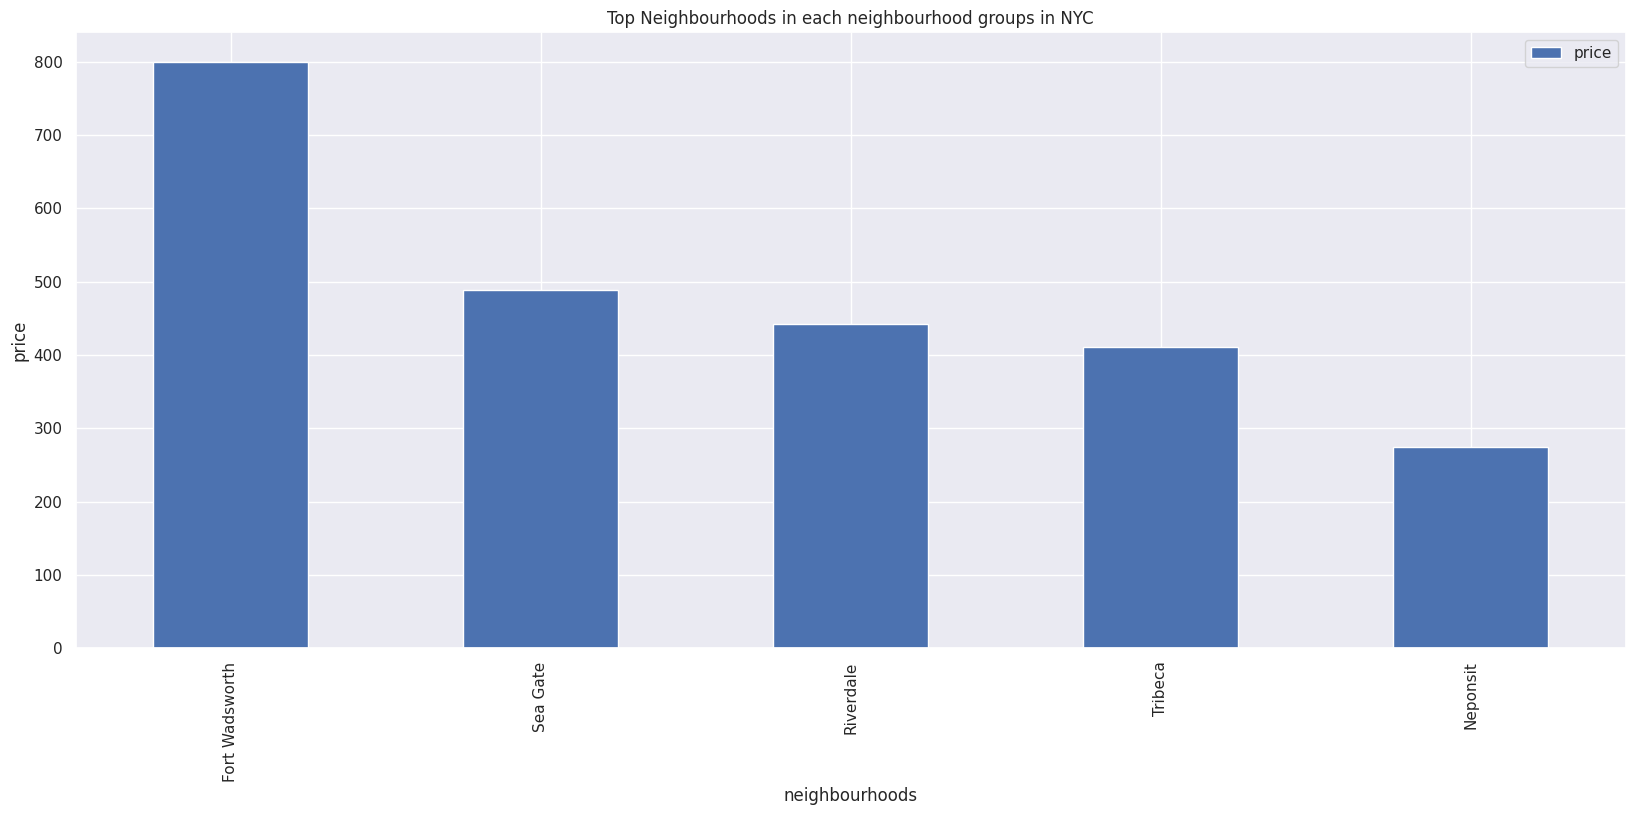

In [ ]:
top_neigh_each.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

##### 1. Why did you pick the specific chart?

Answer Here.

- The bar chart was chosen to visualize the top neighbourhoods in each neighbourhood group in NYC because it is a simple and effective way to compare the average prices of different neighbourhoods.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: Fort Wadsworth & Sea Gate, origins from Staten Island & Brooklyn.

Riverdale from Bronx and Tribeca from Manhattan. Neponsit from Queens.

- These neighbourhoods are likely to be the most popular and desirable places to live in NYC, and they may also be the most expensive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

- The insights gained from the bar chart can be used to help Airbnb hosts target their marketing efforts to the most popular and desirable neighbourhoods in NYC.
- This can help hosts to increase their bookings and revenue.
- Additionally, the insights can help hosts to set their prices more competitively in the most expensive neighbourhoods.
- This can help hosts to attract more guests and increase their revenue.

# costliest listings in each neighbourhood groups & their respective hosts:

In [ ]:
# costliest listings in each neighbourhood groups

costliest_df= df_air_pnw.loc[df_air_pnw.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

In [ ]:
costliest_df.sort_values(by='price',ascending=False)

name neighbourhood_group  \
38498                 LUXURIOUS 5 bedroom, 4.5 bath home           Manhattan   
29665         Park Place Townhouse by (Hidden by Airbnb)            Brooklyn   
42680                      Majestic Mansion LifeStyle :)              Queens   
24477                            "The luxury of Comfort"               Bronx   
45572  Central Hall Colonial with Free Parking Bus EX...       Staten Island   

        host_name  price  
38498        Lisa   2999  
29665       Sally   2626  
42680        Shah   2600  
24477       Kathy   2500  
45572  Anastasios   1250

Looks like the top 2 costliest listings: **LUXURIOUS 5 bedroom, 4.5 bath home** & **Park Place Townhouse** were from Manhattan and Brooklyn, hosted by Lisa and Sally respectively.

**Also, the cheapest listings in each neighbourhood groups & their respective hosts:**

In [ ]:
# cheapest listings in each neighbourhood groups

cheapest_df= df_air_pnw.loc[df_air_pnw.groupby('neighbourhood_group')['price'].idxmin()][['neighbourhood_group','name','host_name','price']]

In [ ]:
cheapest_df.sort_values(by='price',ascending=True)

neighbourhood_group                                              name  \
2887             Brooklyn                             Amazing Spacious Room   
7431            Manhattan  Cozy room right on BROADWAY - Washington Heights   
6615               Queens                Super Clean, Quiet & Spacious Room   
30312       Staten Island      Nice room near SI Ferry \n15 minutes by car.   
3889                Bronx                              A Simple, Calm Space   

         host_name  price  
2887   Lord Daniel     31  
7431           Nga     31  
6615          Troy     31  
30312       Sara I     31  
3889          Août     32

Looks almost all the neighbourhood groups with the lowest price falls in the same price range for the cheapest listings.

# Room_types vs price on different neighbourhood groups

In [ ]:
# unique rooms available throughout NYC

df_air_pnw['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Chart - 10

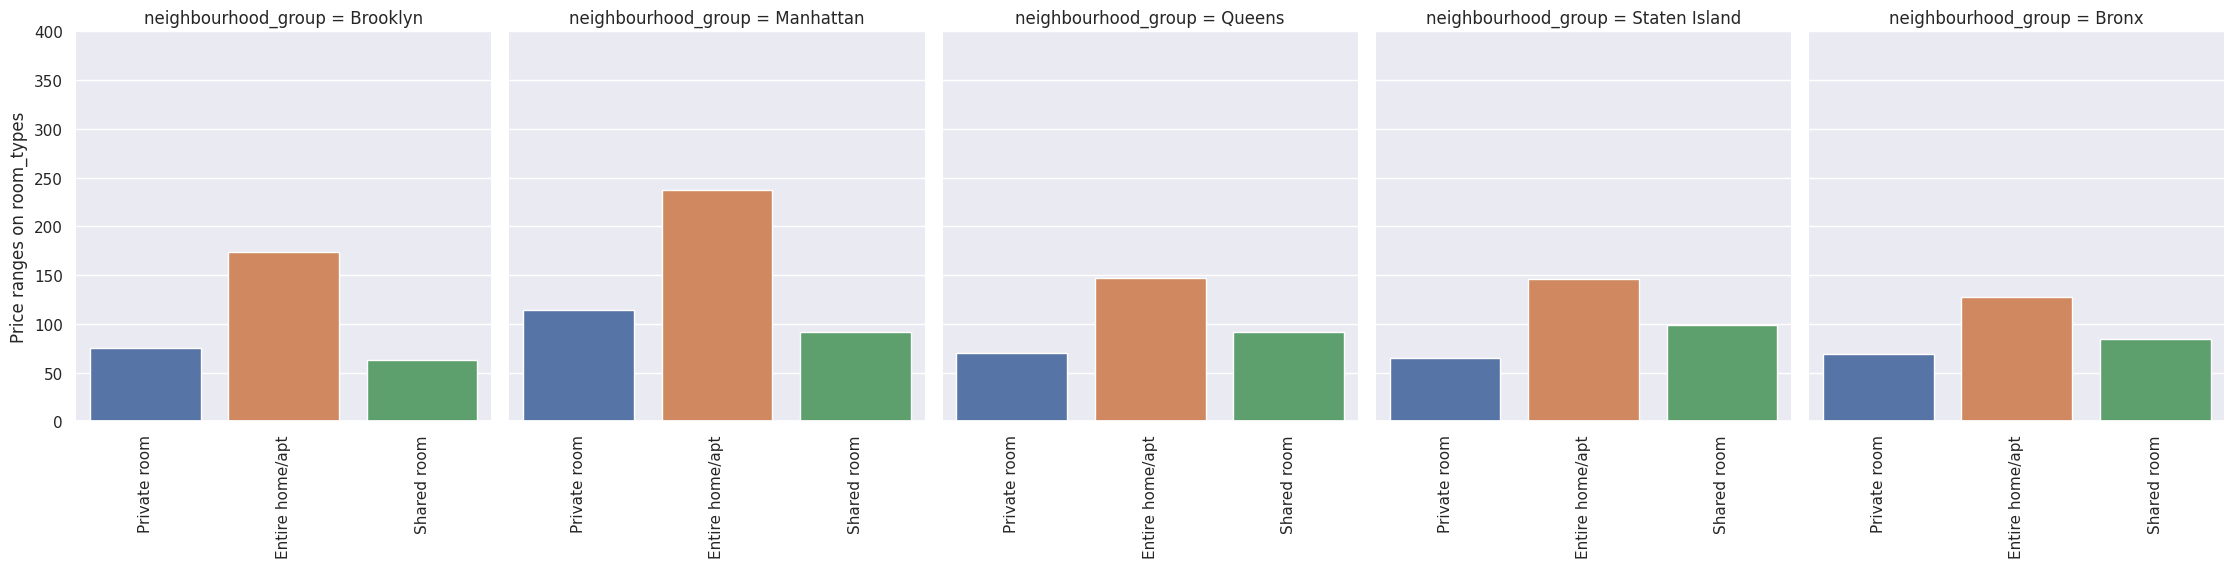

In [ ]:
# room_type vs price

g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_air_pnw, saturation=.8,
                kind="bar",errorbar=None,  aspect=.9)
(g.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True))

##### 1. Why did you pick the specific chart?

Answer Here.


- The bar chart was chosen to visualize the relationship between room type and price on different neighbourhood groups in NYC because it is a simple and effective way to compare the average prices of different room types.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Looks like a property/listing with **Entire home/apt** as room_type wins the show at NYC followed by private rooms. <br>

- **Manhattan** has the highest price for room types with **Entire home/apt**  ranging to nearly 240 USD/night, followed by **Private room** with 110 USD/night. And it's obvious being the most expensive place to live in!

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

- The insights gained from the bar chart can be used to help Airbnb hosts set their prices more competitively for different room types.
- This can help hosts to attract more guests and increase their revenue.
- Additionally, the insights can help hosts to target their marketing efforts to the most popular room types in each neighbourhood group.
- This can help hosts to increase their bookings and revenue.


# On an average for how many nights people stayed in each room_types

#### Chart - 11

Text(0, 0.5, 'Min Stays')

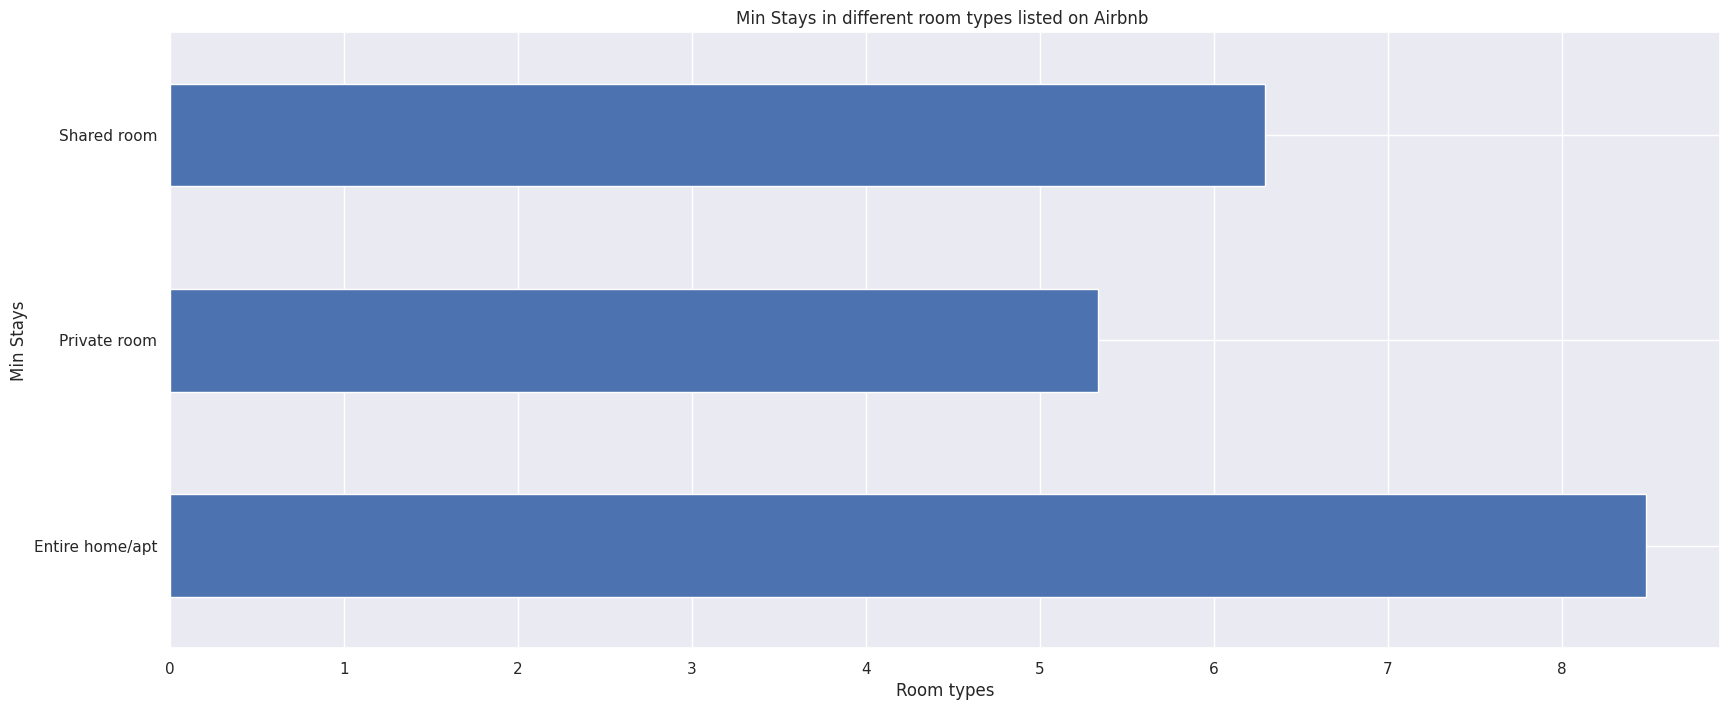

In [ ]:
# Visualising on an average for how many nights people stayed in each room_types

df_air_pnw.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='b')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')

##### 1. Why did you pick the specific chart?

Answer Here.


- The bar chart was chosen to visualize the average number of nights people stayed in each room type because it is a simple and effective way to compare the average stays of different room types.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Looking at these it clearly indicates that people mostly prefer living in an **entire home/apt** on an average of more than **8 nights** followed by guests who stayed in **shared room** where average stay is **6-7 nights**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

- The insights gained from the bar chart can be used to help Airbnb hosts set their minimum night stays more competitively for different room types.
- This can help hosts to attract more guests and increase their revenue.

# Top 10 most reviewed listings in NYC

In [ ]:
# top 10 most reviewed listings in NYC

top10_reviewed_listings= df_air.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]

name  reviews_per_month  \
42075  Enjoy great views of the City in our Deluxe Room!                 58   
42076           Great Room in the heart of Times Square!                 27   
38870                 Lou's Palace-So much for so little                 20   
27287  JFK Comfort.5 Mins from JFK Private Bedroom & ...                 19   
28651      JFK 2 Comfort 5 Mins from JFK Private Bedroom                 17   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE                 16   
22469  Cute Tiny Room Family Home by LGA NO CLEANING FEE                 16   
29628      JFK 3 Comfort 5 Mins from JFK Private Bedroom                 16   
36238                                 “For Heaven Cakes”                 15   
40036            6 Minutes From JFK Airport Cozy Bedroom                 15   

      neighbourhood_group  
42075           Manhattan  
42076           Manhattan  
38870              Queens  
27287              Queens  
28651              Queens  
20403              Queens  
22469              Queens  
29628              Queens  
36238              Queens  
40036              Queens

- So, this are the listings with highest number of reviews, the highest being: **Enjoy great views of the City in our Deluxe Room!** with 58 reviews/month followed by **Great Room in the heart of Times Square!** with a total of 27 reviews/month.
- Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.  

#### Chart - 12

## Most Reviewed room_types in each Neighbourhood Groups

**Also, Lets look how monthly reviews varies with room types in each neighbourhood groups!**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

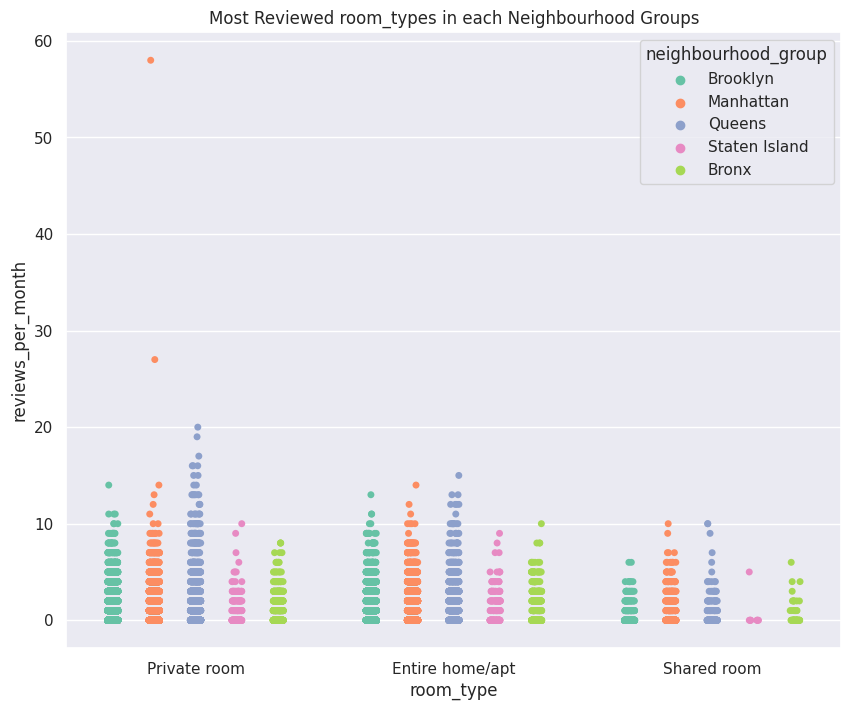

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=df_air,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

##### 1. Why did you pick the specific chart?

Answer Here.


- The stripplot was chosen to visualize the monthly reviews for different room types in each neighbourhood group because it is a simple and effective way to compare the reviews of different room types.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- We can see that **Private room** recieved the most no of reviews/month where **Manhattan** had the highest reviews received for Private rooms with more than 50 reviews/month, followed by **Manhattan** in the chase.

- Manhattan & Queens got the most no of reviews for Entire home/apt room type. <

- There were less reviews recieved from **shared rooms** as compared to other room types and it was from **Staten Island** followed by **Bronx**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


The insights gained from the stripplot can be used to help Airbnb hosts market their listings more effectively.
- For example, hosts who have private rooms in Manhattan can target their marketing efforts to guests who are looking for affordable accommodation in a popular area.
- Additionally, hosts who have entire homes/apartments in Queens and Manhattan can target their marketing efforts to guests who are looking for spacious accommodation in a convenient location.
- Finally, hosts who have shared rooms in Staten Island and the Bronx can target their marketing efforts to guests who are looking for budget-friendly accommodation in a less popular area.

#### Chart - 13

## **Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

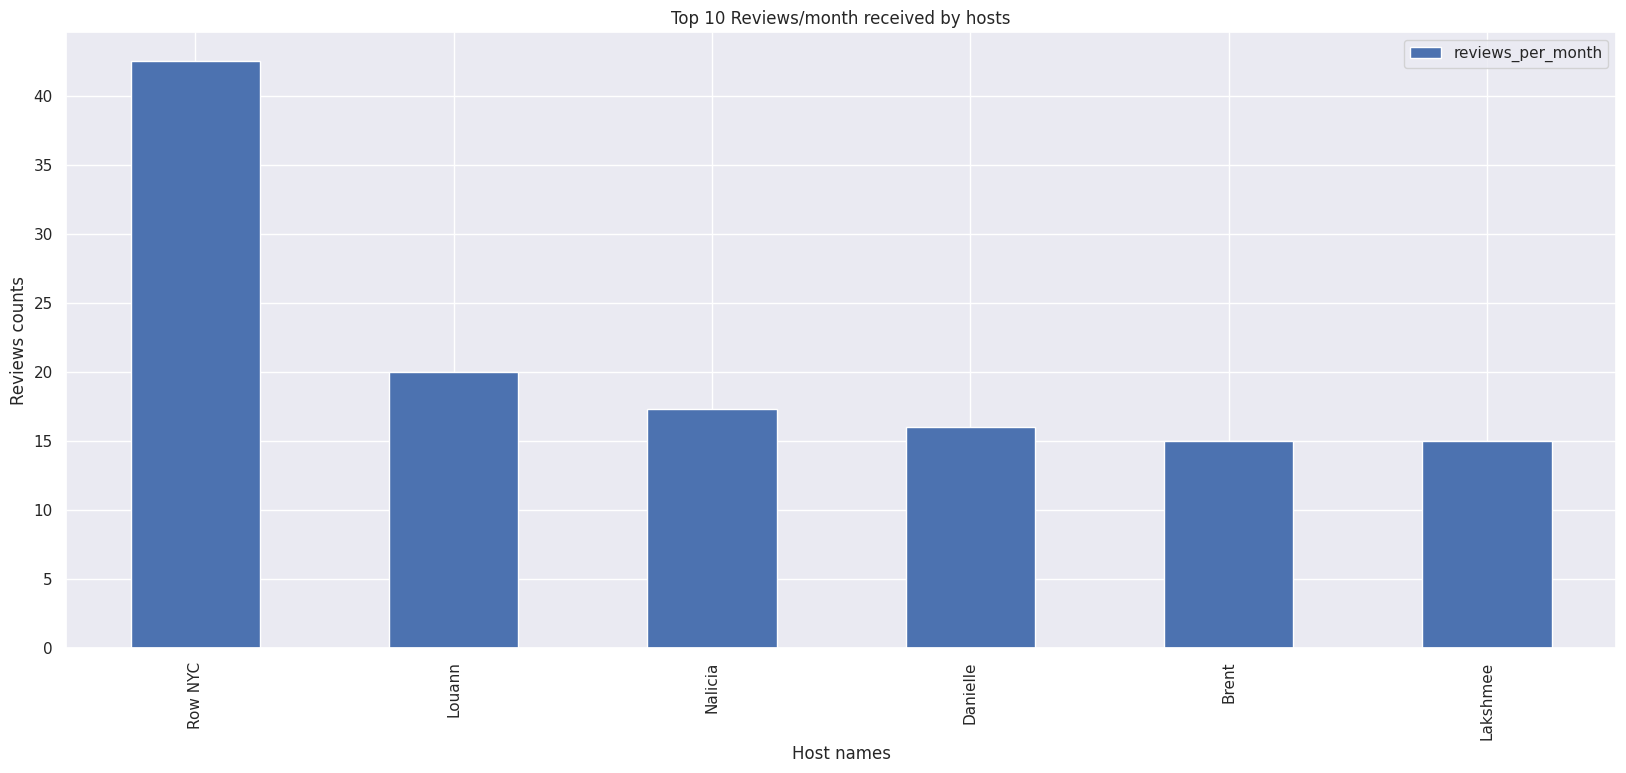

In [ ]:
# there are cases where same hosts are hosting multiple properties in same/different areas.

reviews_df=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean()
reviews_df=reviews_df.reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews_df.plot(x='host_name',y='reviews_per_month',kind='bar',color='b')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

##### 1. Why did you pick the specific chart?

Answer Here.


- The bar chart was chosen to visualize the top 10 reviewed hosts on the basis of reviews/month because it is a simple and effective way to compare the reviews of different hosts.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Row NYC holds the title as the most reviewed host with more than 40 reviews/month on average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The insights gained from the bar chart can be used to help Airbnb hosts market their listings more effectively.
 - For example, hosts who have private rooms in Manhattan can target their marketing efforts to guests who are looking for affordable accommodation in a popular area.
 - Additionally, hosts who have entire homes/apartments in Queens and Manhattan can target their marketing efforts to guests who are looking for spacious accommodation in a convenient location.
 - Finally, hosts who have shared rooms in Staten Island and the Bronx can target their marketing efforts to guests who are looking for budget-friendly accommodation in a less popular area.


# Hosts with most no of listings in NYC(on the basis of host listings count):

In [ ]:
# host_with_most_listings

host_with_most_listings= df_air.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

host_name neighbourhood_group  calculated_host_listings_count
13217       Sonder (NYC)           Manhattan                          106929
1834          Blueground           Manhattan                           53360
7275                Kara           Manhattan                           14669
6540      Jeremy & Laura           Manhattan                            9216
13216             Sonder           Manhattan                            9216
2901   Corporate Housing           Manhattan                            8281
7480              Kazuya              Queens                            8137
7546                 Ken           Manhattan                            7500
11399            Pranjal           Manhattan                            4225
9856                Mike           Manhattan                            2824

So, **Sonder(NYC)** leads the most expensive neighbourhood group in NYC with around 106929 properties listed followed by Blueground and Kara. <br>

Also, all 3 of them has their listings on Manhattan.

We can also check for **hosts with most listings in each neighbourhood group**.<br>

The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

In [ ]:
# The hosts leading each neighbourhood group with most no of Airbnb listings in entire NYC.

hosts_df=host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == host_with_most_listings['calculated_host_listings_count']
host_with_most_listings[hosts_df].sort_values(by='calculated_host_listings_count',ascending=False)

host_name neighbourhood_group  calculated_host_listings_count
13217  Sonder (NYC)           Manhattan                          106929
7480         Kazuya              Queens                            8137
14432          Vida            Brooklyn                            2705
14435           Vie               Bronx                             169
685       Amarjit S       Staten Island                              64

So, **Sonder (NYC)**, Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC!

# Room_types and their relation with availability in different neighbourhood groups

#### Chart - 14

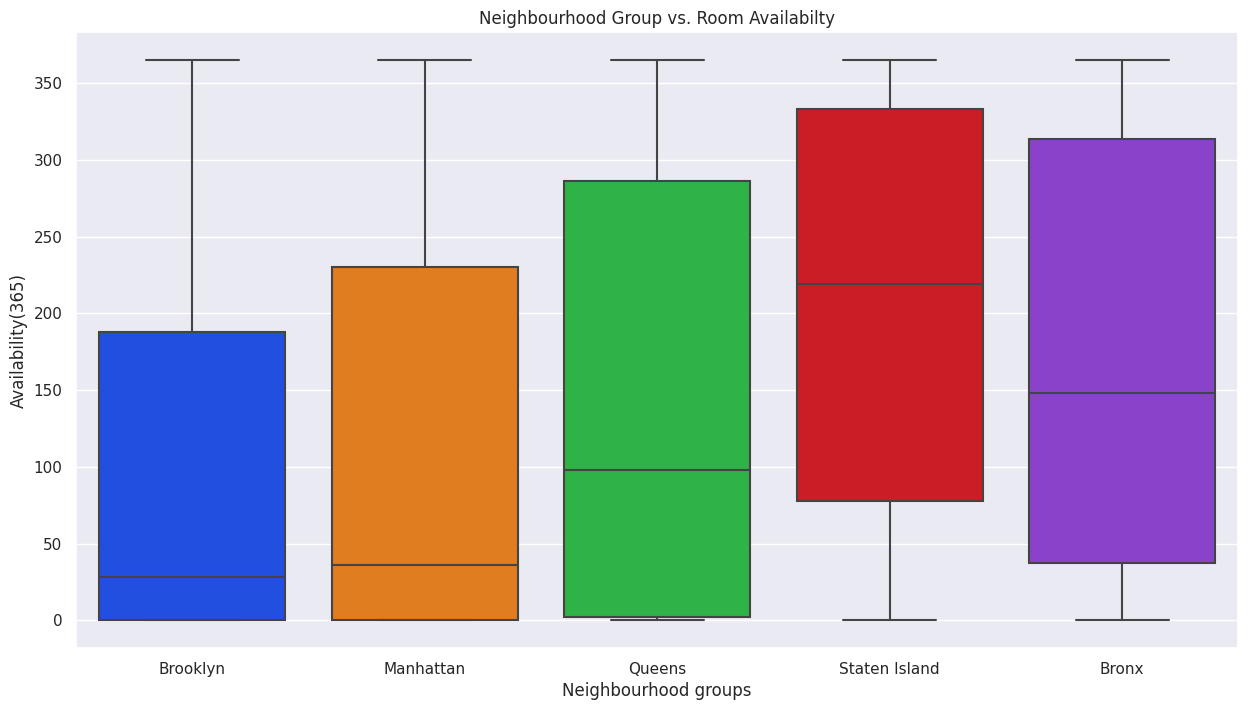

In [ ]:
# Room_types and their relation with availability in different neighbourhood groups

f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_air,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

In [ ]:
# all 3 Room_types and their relation with availability in different neighbourhood groups

import plotly.express as px
fig = px.box(df_air, x="neighbourhood_group", y="availability_365", color="room_type")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.


- The boxplot was chosen to visualize the relationship between room types and availability in different neighbourhood groups because it is a simple and
effective way to compare the availability of different room types in different neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- Looking at the above categorical box plot we can infer that the listings in **Staten Island** seems to be more available throughout the year to more than 300 days.
-  On an average, these listings are available to around 210 days every year followed by **Bronx** where every listings are available for 150 on an average every year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The insights gained from the boxplot can be used to help Airbnb hosts market their listings more effectively.
- For example, hosts who have private rooms in Manhattan can target their marketing efforts to guests who are looking for affordable accommodation in a popular area.
- Additionally, hosts who have entire homes/apartments in Queens and Manhattan can target their marketing efforts to guests who are looking for spacious accommodation in a convenient location.
- Finally, hosts who have shared rooms in Staten Island and the Bronx can target their marketing efforts to guests who are looking for budget-friendly accommodation in a less popular area.

# Let's see what can be done with latitude and longitude!

#### Chart - 15

## latitude and longitude coordinates across entire NYC

In [ ]:
# with Plotly map visualisation we trying to find where the coordinates belong from the latitude and longitude

import plotly.express as px
fig = px.scatter_mapbox(df_air_pnw, lat="latitude", lon="longitude", color="neighbourhood_group", opacity=0.5,
                   zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# **Room_type**

#### Chart - 16

## Distribution of type of rooms across NYC

In [ ]:
# Distribution of type of rooms across NYC

fig = px.scatter_mapbox(df_air_pnw, lat="latitude", lon="longitude", color="room_type", opacity=0.5,
                   zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.


- The plotly library scatterplot was chosen to visualize the distribution of type of rooms across NYC because it is a simple and effective way to compare the distribution of different room types in different areas of NYC.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt. <br>

- 95% of the listings on Airbnb are either **Private room** or **Entire/home apt**. Very few guests had opted for shared rooms on Airbnb. <br>

- Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the scatterplots can be used to help Airbnb hosts market their listings more effectively.
- For example, hosts who have private rooms in Manhattan can target their marketing efforts to guests who are looking for affordable accommodation in a popular area.
- Additionally, hosts who have entire homes/apartments in Queens and Manhattan can target their marketing efforts to guests who are looking for spacious accommodation in a convenient location.
- Finally, hosts who have shared rooms in Staten Island and the Bronx can target their marketing efforts to guests who are looking for budget-friendly accommodation in a less popular area.

#### Chart - 17

**Let's have an idea of the price variations across these co-ordinates in a more clear way**

In [ ]:
# price variations across these co-ordinates in a more clear way

fig = px.scatter_mapbox(df_air_pnw1, lat="latitude", lon="longitude", color="price", opacity=0.5,
                   zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

Because it is a good way to visualize the distribution of prices across NYC.
The scatterplot allows us to see how prices vary depending on the location of the listing, and the colormap helps us to identify areas where prices are high or low.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We can infer that there are high range of prices across **Manhattan** being the most costliest place to stay in NYC

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the scatterplot can be used to help Airbnb hosts market their listings more effectively.
- For example, hosts who have listings in high-priced areas can target their marketing efforts to guests who are willing to pay more for a luxurious stay.
- Additionally, hosts who have listings in low-priced areas can target their marketing efforts to guests who are looking for a budget-friendly option.
- Finally, hosts who have listings in areas with a wide range of prices can target their marketing efforts to guests who are flexible with their budget.

#### Chart - 18

## **The listings availability in a year throughout NYC**

In [ ]:
# The listings availability in a year throughout NYC

fig = px.scatter_mapbox(df_air_pnw1, lat="latitude", lon="longitude", color="availability_365", opacity=0.5,
                   zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.


Because it is a good way to visualize the distribution of availability across NYC.

The scatterplot allows us to see how availability varies depending on the location of the listing, and the colormap helps us to identify areas where availability is high or low.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

- **Bronx** & **Staten Island** has listings which are mostly available throughout the year, might be the case as they are not much costlier as compared to other boroughs as in Manhanttan, Brooklyn & Queens.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the scatterplot can be used to help Airbnb hosts market their listings more effectively.
- For example, hosts who have listings in areas with high availability can target their marketing efforts to guests who are looking for a flexible stay.
- Additionally, hosts who have listings in areas with low availability can target their marketing efforts to guests who are looking for a specific date range.
- Finally, hosts who have listings in areas with a moderate availability can target their marketing efforts to guests who are willing to compromise on their desired dates.

#### Chart - 19 - Pair Plot

In [ ]:
# Pair Plot visualization code

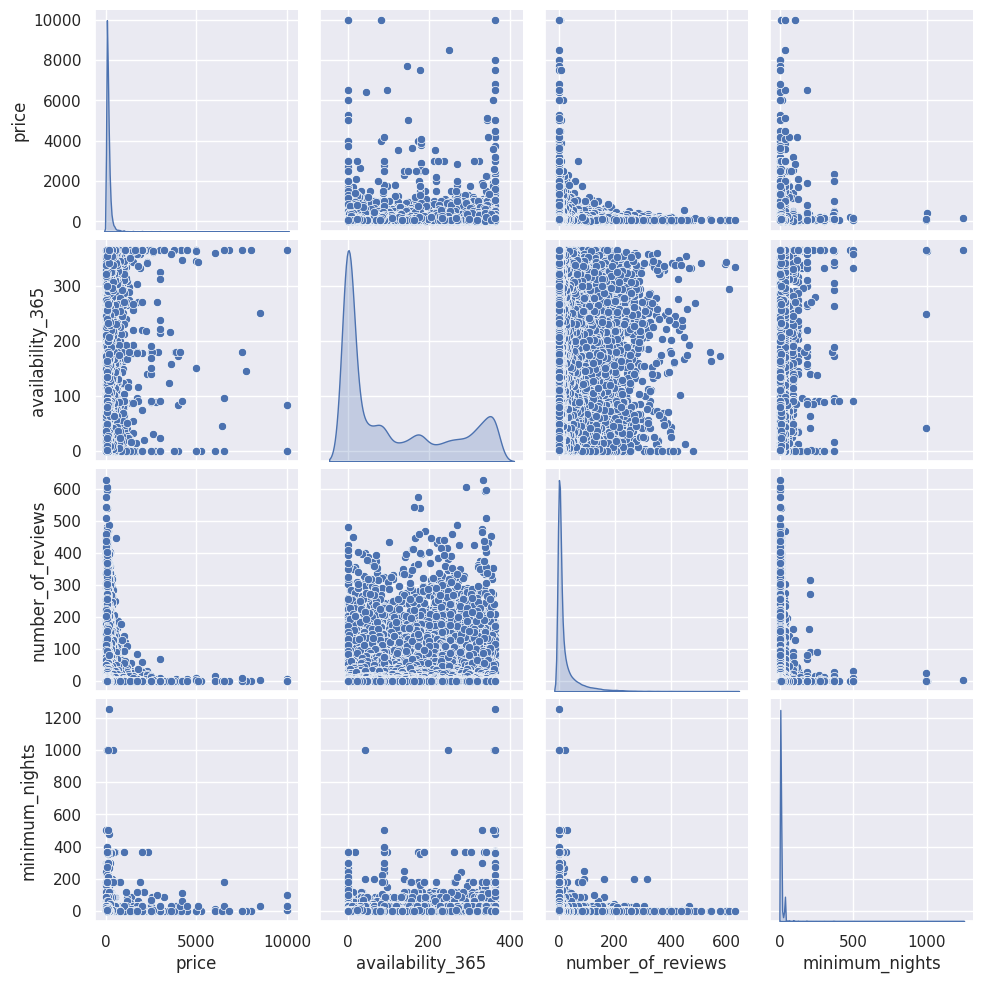

In [ ]:
import seaborn as sns

# Pair plot
sns.pairplot(df_air, vars=['price', 'availability_365', 'number_of_reviews', 'minimum_nights'], diag_kind='kde')

##### 1. Why did you pick the specific chart?

Answer Here.


To visualize the relationships between the different variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


- A positive correlation between the price of a listing and the number of reviews it has received.
- A positive correlation between the price of a listing and the minimum number of nights that guests must stay.
- A negative correlation between the availability of a listing and the number of reviews it has received.
- A negative correlation between the availability of a listing and the minimum number of nights that guests must stay.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Answer Here

The insights gained from the pair plot can be used to help Airbnb hosts market their listings more effectively.
- For example, hosts who have listings that are priced higher than average can target their marketing efforts to guests who are willing to pay more for a luxurious stay.
- Additionally, hosts who have listings that are available for a longer period of time can target their marketing efforts to guests who are looking for a flexible stay.
- Finally, hosts who have listings that have received a lot of reviews can target their marketing efforts to guests who are looking for a well-reviewed listing.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

Based on the analysis, I would suggest the following to the client:
- **Focus on marketing listings in areas with high availability.** This will help to attract guests who are looking for a flexible stay.
- **Target guests who are willing to pay more for a luxurious stay.** This can be done by marketing listings that are priced higher than average and have received a lot of reviews.
- **Promote listings that are available for a longer period of time.** This will help to attract guests who are looking for a long-term stay.

# **Conclusion**

Write the conclusion here.

- In this project, we explored the Airbnb listings in NYC. We found that the most expensive listings are located in Manhattan, Brooklyn, and Queens. The cheapest listings are located in Staten Island, the Bronx, and Queens.
- We also found that the most popular room type is **Entire home/apt**. The average number of nights people stay in an Airbnb listing is 4.19 nights.
- There is a positive correlation between price and number of reviews, and a negative correlation between price and availability_365.
- We clustered all the neighbourhoods based on average price/day of Airbnb listings and number of Airbnb listings.
- The neighbourhoods with the highest average price/day of Airbnb listings are located in Manhattan, Brooklyn, and Queens. The neighbourhoods with the lowest average price/day of Airbnb listings are located in Staten Island, the Bronx, and Queens.
- The neighbourhoods with the highest number of Airbnb listings are located in Manhattan, Brooklyn, and Queens. The neighbourhoods with the lowest number of Airbnb listings are located in Staten Island, the Bronx, and Queens.
- This project provides insights into the Airbnb market in NYC. This information can be used by Airbnb hosts to set their prices, target their marketing efforts, and improve their listings.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***